In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

## Explore the data

In [4]:
df=pd.read_csv("data/dataSetFinal.csv")


In [5]:
columns=df.columns
columns

Index(['cik', 'companyName', 'ticker', 'accessionNo', 'Assets', 'fy', 'fp',
       'form', 'filed', 'Current_Assets', 'Current_liabilities',
       'Stockholder_Equity', 'Liabilities_And_StockholderEquity',
       'Earning_Before_Interest_And_Taxes', 'Retained_Earnings', 'Revenues',
       'Working_capital', 'Liabilities', 'NetCash_OperatingActivities',
       'NetCash_InvestingActivities', 'NetCash_FinancingActivities', 'Cash',
       'AccountsReceivable', 'Inventory', 'Current_Other_Assets',
       'Noncurrent_Assets', 'Intangible_Assets', 'AccountsPayable',
       'NetIncome', 'GrossProfit', 'Operating_Expenses', 'Nonoperating_Income',
       'InterestExpense', 'ShortTerm_Debt', 'LongTerm_Debt',
       'Noncurrent_Liabilities', 'is_bankrupt'],
      dtype='object')

## Checking data type


In [6]:
df.dtypes

cik                                    int64
companyName                           object
ticker                                object
accessionNo                           object
Assets                               float64
fy                                     int64
fp                                    object
form                                  object
filed                                 object
Current_Assets                       float64
Current_liabilities                  float64
Stockholder_Equity                   float64
Liabilities_And_StockholderEquity    float64
Earning_Before_Interest_And_Taxes    float64
Retained_Earnings                    float64
Revenues                             float64
Working_capital                      float64
Liabilities                          float64
NetCash_OperatingActivities          float64
NetCash_InvestingActivities          float64
NetCash_FinancingActivities          float64
Cash                                 float64
AccountsRe

In [7]:
df.shape
# df.info 

(205653, 37)

# Preprocessing

## Data reduction

In [8]:
columns_to_drop = ['cik', 'ticker', 'accessionNo', 'companyName', 'fy', 'fp', 'form', 'filed']

# Drop the specified columns if they exist in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [9]:
df.shape 

(205653, 29)

## Duplicate values

In [10]:
df.duplicated().sum()

42856

In [11]:
df= df.drop_duplicates()
df.duplicated().sum()

0

## Checking if there is null values


In [12]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Assets                                 2678
Current_Assets                        33815
Current_liabilities                   33982
Stockholder_Equity                    12075
Liabilities_And_StockholderEquity      2572
Earning_Before_Interest_And_Taxes     37449
Retained_Earnings                      9918
Revenues                              85649
Working_capital                       35785
Liabilities                           29162
NetCash_OperatingActivities            4026
NetCash_InvestingActivities           17747
NetCash_FinancingActivities            8690
Cash                                  16424
AccountsReceivable                    82148
Inventory                             93527
Current_Other_Assets                 128836
Noncurrent_Assets                    153343
Intangible_Assets                    107156
AccountsPayable                       68307
NetIncome                             16266
GrossProfit                          101740
Operating_Expens

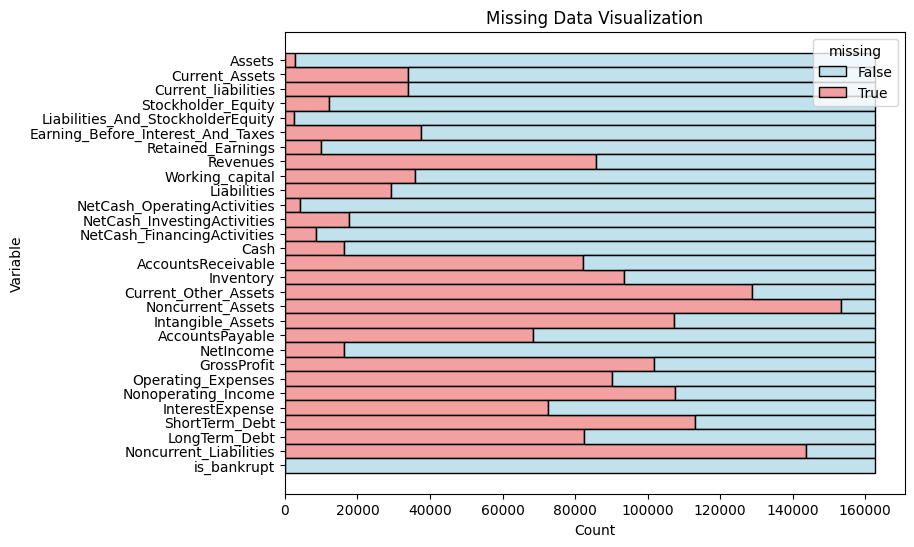

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = df.isnull().melt(var_name='variable', value_name='missing')


plt.figure(figsize=(8, 6))
sns.histplot(
    data=df_melt,
    y='variable',
    hue='missing',
    multiple='stack',
    palette={True: 'lightcoral', False: 'lightblue'}
)

plt.title('Missing Data Visualization')
plt.xlabel('Count')
plt.ylabel('Variable')
plt.show()

In [14]:
# ## dendogramme
# # Create a boolean DataFrame showing where values are missing
# missing_data = df.isnull()

# # Perform hierarchical clustering using linkage
# Z = linkage(missing_data.T, method='ward')

# # Plotting the dendrogram
# plt.figure(figsize=(10, 8))
# dendrogram(Z, labels=missing_data.columns, leaf_rotation=90)

# plt.title('Missing Data Visualization 2')
# plt.xlabel('Variables')
# plt.ylabel('Distance')
# plt.show()

### I decided to delete columns with a lot missing data (55% )


In [15]:
# using a 55% threshold is a standard approach for dropping columns, always validate against your problem, domain, and dataset

# Calculate the percentage of missing values for each column
missing_percentages = df.isnull().mean() * 100

# Filter and sort columns with more than 55% missing values
columns_to_drop = missing_percentages[missing_percentages > 55].sort_values(ascending=False)
columns_to_drop1 = missing_percentages[missing_percentages > 55].index.tolist()

# Print the columns and their corresponding percentages
print("Columns with more than 55% missing values (in descending order):")
for column, percentage in columns_to_drop.items():
    print(f"{column}: {percentage:.2f}%")


Columns with more than 55% missing values (in descending order):
Noncurrent_Assets: 94.19%
Noncurrent_Liabilities: 88.33%
Current_Other_Assets: 79.14%
ShortTerm_Debt: 69.53%
Nonoperating_Income: 66.13%
Intangible_Assets: 65.82%
GrossProfit: 62.50%
Inventory: 57.45%
Operating_Expenses: 55.34%


In [16]:
#columns_to_drop = ['Noncurrent_Liabilities','ShortTerm_Debt','Nonoperating_Income','GrossProfit','Intangible_Assets','Current_Other_Assets','Noncurrent_Assets']

df.drop(columns=[col for col in columns_to_drop1 if col in df.columns], inplace=True)
df.shape 

(162797, 20)

## Distribution between bankrupt and normal company 

In [17]:
X = df.drop(['is_bankrupt'], axis=1)
y = df['is_bankrupt']
y.value_counts()

is_bankrupt
0    162749
1        48
Name: count, dtype: int64

C:\Users\yosra\AppData\Local\Temp\ipykernel_11992\4194475282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_bankrupt', data=df , palette=['skyblue', 'lightcoral'])


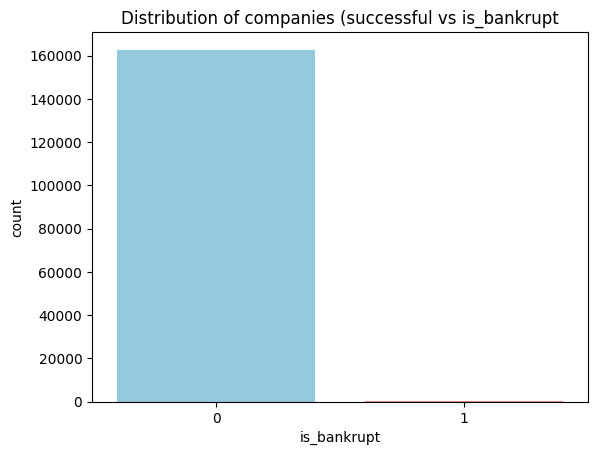

In [18]:
sns.countplot(x='is_bankrupt', data=df , palette=['skyblue', 'lightcoral'])
plt.title('Distribution of companies (successful vs is_bankrupt')
plt.show()

## Splitting data

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ** Separte the majority and minority **

In [20]:
# Separating training data 
#minority
X_train_bankrupted = X_train[y_train == 1]
y_train_bankrupted = y_train[y_train == 1]
#majority
X_train_successful = X_train[y_train == 0]
y_train_successful = y_train[y_train == 0]

# Separating testing data
#minority
X_test_bankrupted = X_test[y_test == 1]
y_test_bankrupted = y_test[y_test == 1]
#majority
X_test_successful = X_test[y_test == 0]
y_test_successful = y_test[y_test == 0]


### **for the majority i decided to drop columns with null values**

In [21]:
# Dropping missing values from the training dataset
X_train_successful = X_train_successful.dropna()
y_train_successful = y_train_successful[X_train_successful.index]  # Aligning the target with features

# Dropping missing values from the testing dataset
X_test_successful = X_test_successful.dropna()
y_test_successful = y_test_successful[X_test_successful.index]  # Aligning the target with features


### **for the minority i decided to do data imputation**

### Multiple Imputation with Chained Equations (MICE)


In [22]:
# !pip install fancyimpute

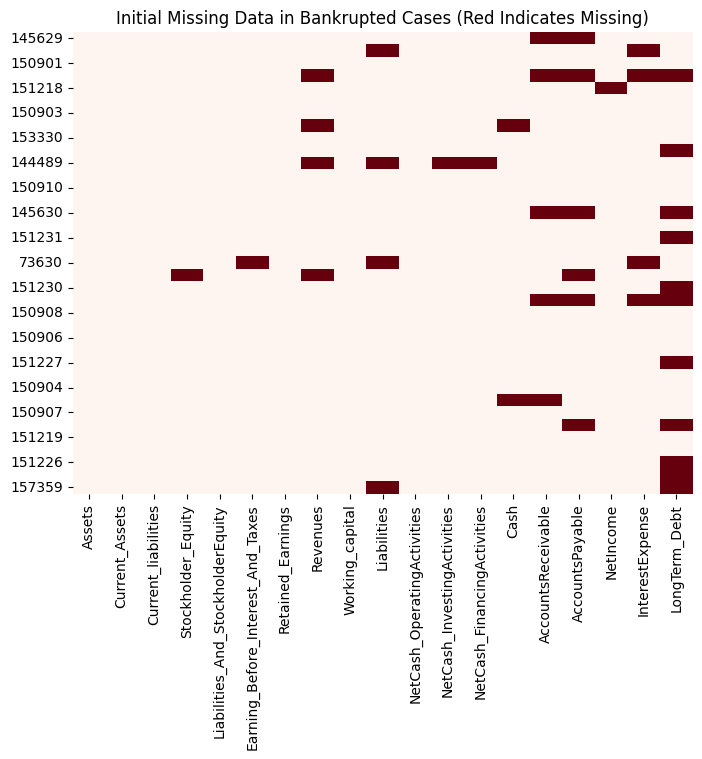

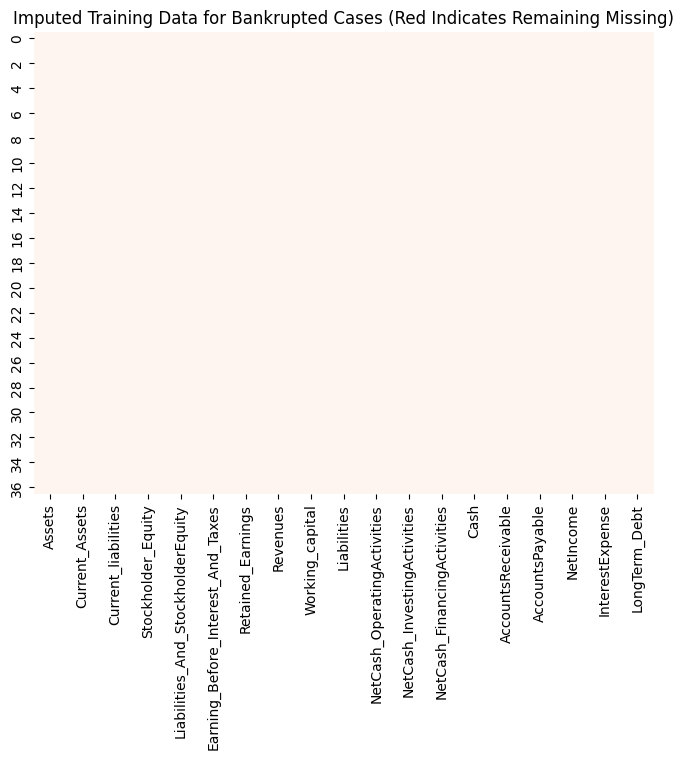

In [23]:
from sklearn.experimental import enable_iterative_imputer  # Enables the IterativeImputer feature
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 3: Visualize Missing Data for Bankrupted Cases (Initial State)
plt.figure(figsize=(8, 6))
sns.heatmap(X_train_bankrupted.isnull(), cbar=False, cmap='Reds')
plt.title('Initial Missing Data in Bankrupted Cases (Red Indicates Missing)')
plt.show()

# Step 4: Randomly fill missing data for bankrupted cases
random_fill_bankrupted = X_train_bankrupted.apply(lambda col: col.fillna(np.random.choice(col.dropna())), axis=0)

# Step 5: Apply MICE (IterativeImputer) for Bankrupted Cases
imputer_bankrupted = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)
imputed_train_bankrupted = imputer_bankrupted.fit_transform(random_fill_bankrupted)

# Convert the result back to a DataFrame
df_train_imputed_bankrupted = pd.DataFrame(imputed_train_bankrupted, columns=random_fill_bankrupted.columns)

# Perform imputation on the test set for bankrupted cases
imputed_test_bankrupted = imputer_bankrupted.transform(X_test_bankrupted)
df_test_imputed_bankrupted = pd.DataFrame(imputed_test_bankrupted, columns=X_test_bankrupted.columns)

# Step 6: Visualize Imputed Data for Bankrupted Cases (Final State)
plt.figure(figsize=(8, 6))
sns.heatmap(df_train_imputed_bankrupted.isnull(), cbar=False, cmap='Reds')
plt.title('Imputed Training Data for Bankrupted Cases (Red Indicates Remaining Missing)')
plt.show()


## Concat the data again

In [24]:

# Concatenate imputed features and target variable for the training set
X_train = pd.concat([df_train_imputed_bankrupted, X_train_successful], axis=0)  
y_train = pd.concat([y_train_bankrupted, y_train_successful], axis=0)  

# Concatenate imputed features and target variable for the testing set
X_test = pd.concat([df_test_imputed_bankrupted, X_test_successful], axis=0)  # Combine features
y_test = pd.concat([y_test_bankrupted, y_test_successful], axis=0)  # Combine targets

# Resetting index (optional but often useful)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(X_train.isnull().sum())

Assets                               0
Current_Assets                       0
Current_liabilities                  0
Stockholder_Equity                   0
Liabilities_And_StockholderEquity    0
Earning_Before_Interest_And_Taxes    0
Retained_Earnings                    0
Revenues                             0
Working_capital                      0
Liabilities                          0
NetCash_OperatingActivities          0
NetCash_InvestingActivities          0
NetCash_FinancingActivities          0
Cash                                 0
AccountsReceivable                   0
AccountsPayable                      0
NetIncome                            0
InterestExpense                      0
LongTerm_Debt                        0
dtype: int64


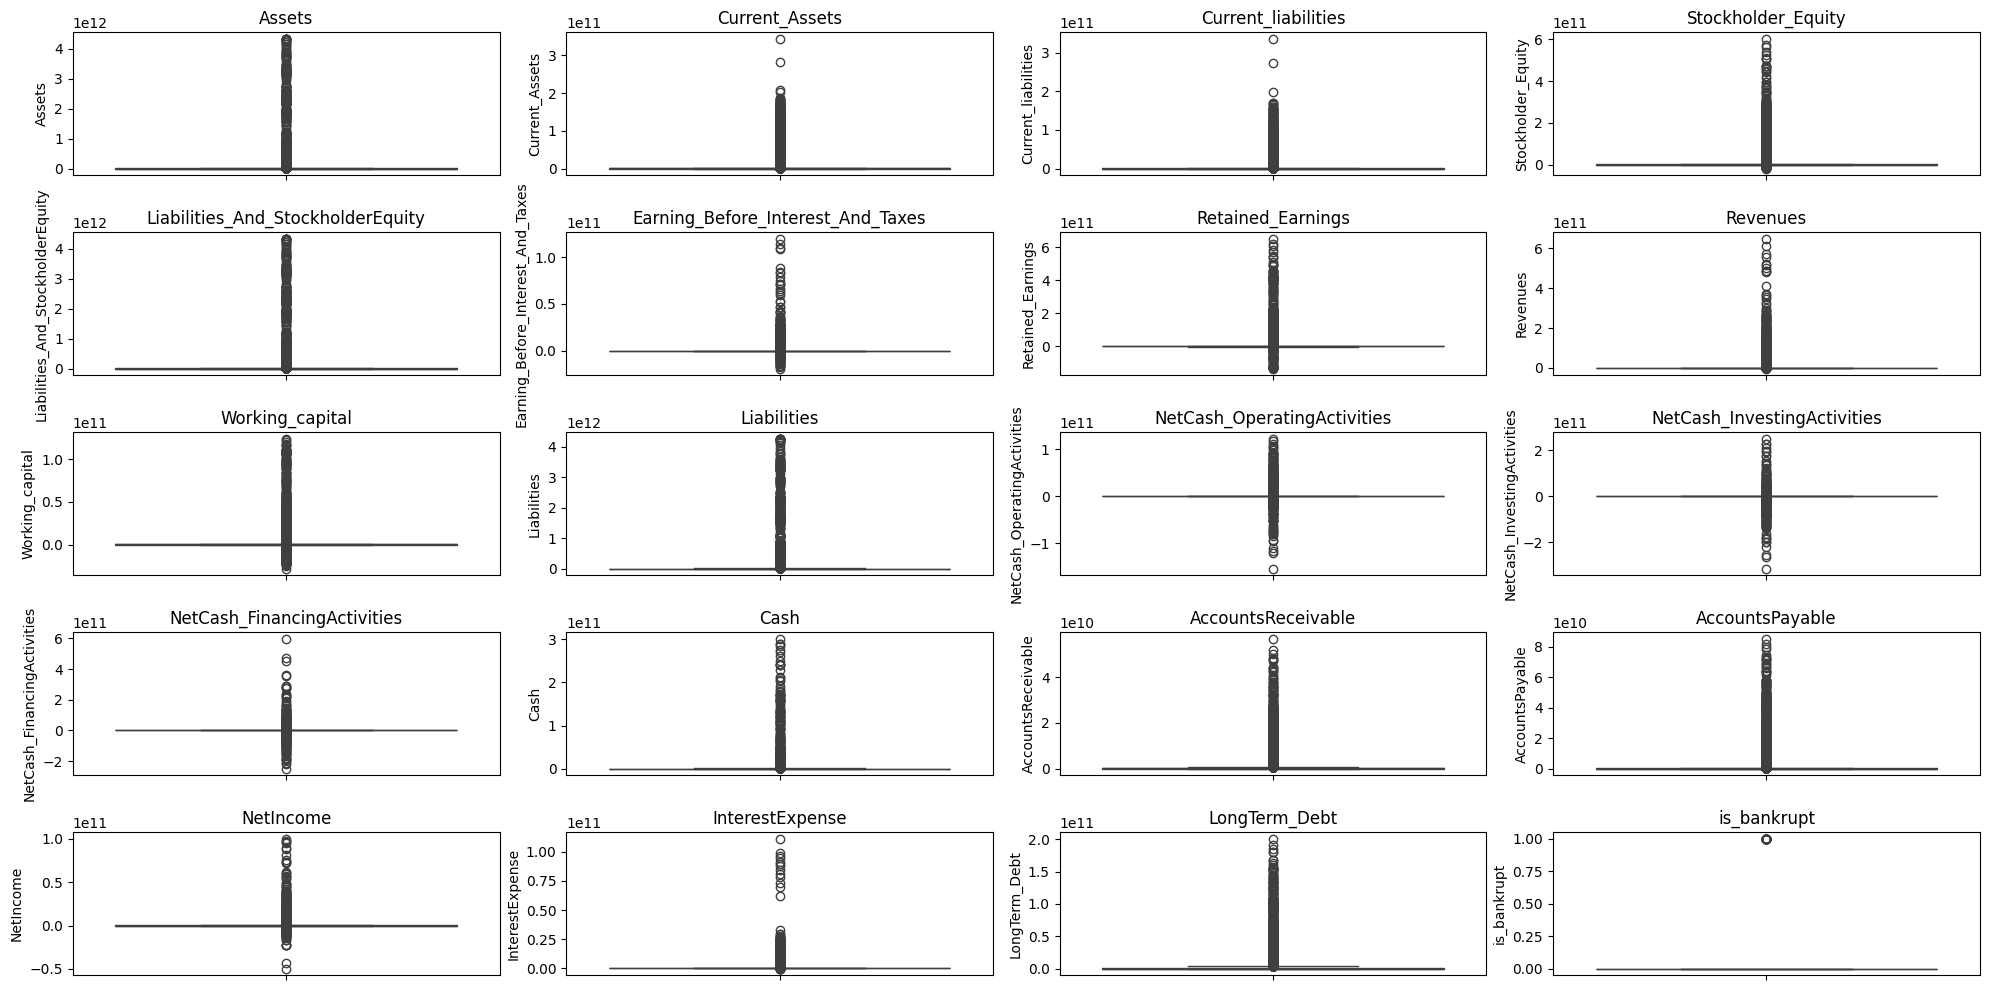

In [25]:
# Set the size of the plot
plt.figure(figsize=(20, 10))
columns=df.columns
# Loop through the columns and create subplots
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
""" # Set the size of the overall plot
plt.figure(figsize=(20, 5))  # Adjust height to fit one row nicely

columns = ['Stockholder_Equity', 'Retained_Earnings', 'Working_capital', 'Liabilities', 'LongTerm_Debt']
rows, cols = 2, 3  # 1 row, 5 columns

# Set y-axis limit
y_max = 1500

# Create subplots
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[column], kde=True)
    plt.ylim(0, y_max)  # Set the y-axis (ordinate axis) limit
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
 """

" # Set the size of the overall plot\nplt.figure(figsize=(20, 5))  # Adjust height to fit one row nicely\n\ncolumns = ['Stockholder_Equity', 'Retained_Earnings', 'Working_capital', 'Liabilities', 'LongTerm_Debt']\nrows, cols = 2, 3  # 1 row, 5 columns\n\n# Set y-axis limit\ny_max = 1500\n\n# Create subplots\nfor i, column in enumerate(columns):\n    plt.subplot(rows, cols, i + 1)\n    sns.histplot(df[column], kde=True)\n    plt.ylim(0, y_max)  # Set the y-axis (ordinate axis) limit\n    plt.title(f'Distribution of {column}')\n\n# Adjust layout\nplt.tight_layout()\n\n# Show the plot\nplt.show()\n "

In [27]:
""" # Set the size of the overall plot
plt.figure(figsize=(20, 5))  # Adjust height to fit one row nicely

columns = ['Stockholder_Equity', 'Retained_Earnings', 'Working_capital', 'Liabilities', 'LongTerm_Debt']
rows, cols = 1, 5  # 1 row, 5 columns

# Set y-axis limit
y_max = 1500

# Create subplots
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[column], kde=True)
    plt.ylim(0, y_max)  # Set the y-axis (ordinate axis) limit
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
 """

" # Set the size of the overall plot\nplt.figure(figsize=(20, 5))  # Adjust height to fit one row nicely\n\ncolumns = ['Stockholder_Equity', 'Retained_Earnings', 'Working_capital', 'Liabilities', 'LongTerm_Debt']\nrows, cols = 1, 5  # 1 row, 5 columns\n\n# Set y-axis limit\ny_max = 1500\n\n# Create subplots\nfor i, column in enumerate(columns):\n    plt.subplot(rows, cols, i + 1)\n    sns.histplot(df[column], kde=True)\n    plt.ylim(0, y_max)  # Set the y-axis (ordinate axis) limit\n    plt.title(f'Distribution of {column}')\n\n# Adjust layout\nplt.tight_layout()\n\n# Show the plot\nplt.show()\n "

### Normalization

In [28]:
print(f"X_train shape: {X_train.shape}")  # Check number of rows
print(f"y_train shape: {y_train.shape}")  # Should match the number of rows in X_train


X_train shape: (5670, 19)
y_train shape: (5670,)


In [29]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Optionally convert the scaled arrays back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now you can check if there are any null values in the scaled data
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Assets                               0
Current_Assets                       0
Current_liabilities                  0
Stockholder_Equity                   0
Liabilities_And_StockholderEquity    0
Earning_Before_Interest_And_Taxes    0
Retained_Earnings                    0
Revenues                             0
Working_capital                      0
Liabilities                          0
NetCash_OperatingActivities          0
NetCash_InvestingActivities          0
NetCash_FinancingActivities          0
Cash                                 0
AccountsReceivable                   0
AccountsPayable                      0
NetIncome                            0
InterestExpense                      0
LongTerm_Debt                        0
dtype: int64
Assets                               0
Current_Assets                       0
Current_liabilities                  0
Stockholder_Equity                   0
Liabilities_And_StockholderEquity    0
Earning_Before_Interest_And_Taxes    0
Retained_Ear

### features engineering **************************

In [30]:
def calculate_ratios(df):
    # R1: Current Ratio = Current Assets / Current Liabilities
    df['R1'] = df['Current_Assets'] / df['Current_liabilities']

    # R2: Debt to Equity Ratio = Liabilities / Stockholder Equity
    df['R2'] = df['Liabilities'] / df['Stockholder_Equity']

    # R3: Working Capital Ratio = Working Capital / Total Assets
    #df['R3'] = df['Working_capital'] / df['Assets']

    # R4: Net Income Margin = Net Income / Revenues
   # df['R4'] = df['NetIncome'] / df['Revenues']

    # R5: Return on Assets (ROA) = Net Income / Total Assets
    #df['R5'] = df['NetIncome'] / df['Assets']

    # R6: Return on Equity (ROE) = Net Income / Stockholder Equity
    df['R6'] = df['NetIncome'] / df['Stockholder_Equity']

    # R7: Cash Ratio = Cash / Current Liabilities
    df['R7'] = df['Cash'] / df['Current_liabilities']

    # R8: Operating Cash Flow to Total Debt Ratio = Net Cash Operating Activities / Total Liabilities
    df['R8'] = df['NetCash_OperatingActivities'] / df['Liabilities']

    # R9: Interest Coverage Ratio = Earnings Before Interest and Taxes (EBIT) / Interest Expense
    #df['R9'] = df['Earning_Before_Interest_And_Taxes'] / df['InterestExpense']

    # R10: Debt to Assets Ratio = Liabilities / Total Assets
    #df['R10'] = df['Liabilities'] / df['Assets']

    # R11: Net Working Capital to Revenues = Working Capital / Revenues
    #df['R11'] = df['Working_capital'] / df['Revenues']

    # R12: Retained Earnings to Assets Ratio = Retained Earnings / Total Assets
    #df['R12'] = df['Retained_Earnings'] / df['Assets']

    # R13: Long-Term Debt to Total Capitalization = Long-Term Debt / (Long-Term Debt + Stockholder Equity)
    df['R13'] = df['LongTerm_Debt'] / (df['LongTerm_Debt'] + df['Stockholder_Equity'])

    # R14: Cash Flow to Sales Ratio = Net Cash Operating Activities / Revenues
    #df['R14'] = df['NetCash_OperatingActivities'] / df['Revenues']

    # R15: Investing Cash Flow to Assets Ratio = Net Cash Investing Activities / Total Assets
    #df['R15'] = df['NetCash_InvestingActivities'] / df['Assets']

    # R16: Financing Cash Flow to Total Debt Ratio = Net Cash Financing Activities / Total Liabilities
    df['R16'] = df['NetCash_FinancingActivities'] / df['Liabilities']

    return df


# Apply the ratio calculations to both X_train and X_test
X_train = calculate_ratios(X_train)
X_test = calculate_ratios(X_test)
print(X_train.shape)
X_test.shape
print(f"X_train shape: {X_train.shape}")  # Check number of rows
print(f"y_train shape: {y_train.shape}")  # Should match the number of rows in X_train
#R3,R4,R5,R9,R10,R11,R12,R14,R15

# # Drop unnecessary columns in both training and test sets
# columns_to_drop = ['R10', 'R4', 'R5', 'R6', 'R12', 'R13', 'R14', 'R15', 'R17', 'R18']
# X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
# X_test = X_test.drop(columns=columns_to_drop, errors='ignore')
# # print(df[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19']].head())

# # Now X_train and X_test will contain the necessary calculated ratios
# print(X_train.head())
# print(X_test.head())


(5670, 26)
X_train shape: (5670, 26)
y_train shape: (5670,)


In [31]:
# Check for NaN values
nan_values = X_train.isna().sum()
print("NaN values in each column:\n", nan_values)

# Check for infinite values
inf_values = X_train.isin([np.inf, -np.inf]).sum()
print("Infinite values in each column:\n", inf_values)

NaN values in each column:
 Assets                               0
Current_Assets                       0
Current_liabilities                  0
Stockholder_Equity                   0
Liabilities_And_StockholderEquity    0
Earning_Before_Interest_And_Taxes    0
Retained_Earnings                    0
Revenues                             0
Working_capital                      0
Liabilities                          0
NetCash_OperatingActivities          0
NetCash_InvestingActivities          0
NetCash_FinancingActivities          0
Cash                                 0
AccountsReceivable                   0
AccountsPayable                      0
NetIncome                            0
InterestExpense                      0
LongTerm_Debt                        0
R1                                   0
R2                                   0
R6                                   0
R7                                   0
R8                                   0
R13                                 

# **Feature Selection**

### **Filter based Methods** 
Basic Statistical Filter Methods
VarianceThreshod (Remove the Constant Feature and Quasi-Constant Features)
Remove Duplicate Features
Correlation & Ranking based statistical Filter Methods
Pearson’s correlation coefficient
Spearman’s rank coefficient
Kendall’s rank coefficient
Statistical Test based Methods
Anova or F-Test
Mutual Information
Chi Square


### ** Basic Statistical Filter Methods **

### 1)  VarianceThreshod (Remove the Constant Feature and Quasi-Constant Features)


In [32]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.01)

In [33]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
# Get features which have the variance greater than the set threshold value = 0.1
sum(var_thres.get_support())

26

### 2) Duplicate columns

In [35]:
X_train_t = X_train.T


In [36]:
# Print the duplicate features
print("Duplicate Features") 
print(X_train_t.duplicated(keep = 'first')) # keep : {'first', 'last', False}, default 'first'
duplicate_feat = X_train_t.duplicated().sum()
print("Count of duplicate_feature :",duplicate_feat)


Duplicate Features
Assets                               False
Current_Assets                       False
Current_liabilities                  False
Stockholder_Equity                   False
Liabilities_And_StockholderEquity    False
Earning_Before_Interest_And_Taxes    False
Retained_Earnings                    False
Revenues                             False
Working_capital                      False
Liabilities                          False
NetCash_OperatingActivities          False
NetCash_InvestingActivities          False
NetCash_FinancingActivities          False
Cash                                 False
AccountsReceivable                   False
AccountsPayable                      False
NetIncome                            False
InterestExpense                      False
LongTerm_Debt                        False
R1                                   False
R2                                   False
R6                                   False
R7                                 

In [37]:
# # Identify rows where values differ
difference_indices = X_train.index[X_train['Liabilities_And_StockholderEquity'] != X_train['Assets']].tolist()
print(f'Differences found at indices: {difference_indices}')
different_rows = X_train.loc[difference_indices]
print('Rows with different values:')
print(different_rows)

Differences found at indices: [892, 2004, 2477, 3837]
Rows with different values:
            Assets  Current_Assets  Current_liabilities  Stockholder_Equity  \
892   1.757655e+07      14631624.0            2940142.0        1.325140e+07   
2004  4.601300e+09     915115000.0          322217000.0        2.738076e+09   
2477  4.475900e+09     934458000.0          536455000.0        2.699867e+09   
3837  4.280620e+07      24551095.0            4641567.0        3.322463e+07   

      Liabilities_And_StockholderEquity  Earning_Before_Interest_And_Taxes  \
892                        1.757655e+07                          1096328.0   
2004                       4.601253e+09                         89800000.0   
2477                       4.475918e+09                        324100000.0   
3837                       4.113170e+07                          4591993.0   

      Retained_Earnings      Revenues  Working_capital   Liabilities  ...  \
892       -3.620377e+07  4.291589e+06       11691482.0

In [38]:
# Print the duplicate features Names only
duplicate_features = X_train_t[X_train_t.duplicated()].index.values
print("duplicate_features: ",duplicate_features)

duplicate_features:  []


In [39]:
# Let drop the duplcate features in original dataframe
X_train = X_train.drop(columns=duplicate_features,axis=1)
X_train.head()

,Assets,Current_Assets,Current_liabilities,Stockholder_Equity,Liabilities_And_StockholderEquity,Earning_Before_Interest_And_Taxes,Retained_Earnings,Revenues,Working_capital,Liabilities,...,NetIncome,InterestExpense,LongTerm_Debt,R1,R2,R6,R7,R8,R13,R16
0,7.921488e+06,1437487.0,9.083390e+06,-1.274462e+06,7.921488e+06,-87655.0,-1.710621e+07,881908.0,-7645903.0,9195950.0,...,-1469598.0,1397067.0,112560.0,0.158254,-7.215554,1.153112,0.035609,-0.013121,-0.096876,-0.002913
1,4.856000e+09,420000000.0,1.194000e+09,-2.341000e+09,4.856000e+09,-13000000.0,-7.466000e+09,409000000.0,-774000000.0,10322283.0,...,-29000000.0,42641.0,0.0,0.351759,-0.004409,0.012388,0.102178,13.659769,-0.000000,-0.775022
2,4.798385e+06,2577599.0,9.791580e+06,-5.261607e+06,4.798385e+06,-515707.0,-2.621935e+07,2628359.0,-7213981.0,10059992.0,...,-666094.0,99492.0,235593.0,0.263246,-1.911962,0.126595,0.000026,0.148514,-0.046875,-0.125769
3,1.066659e+06,1066659.0,1.303883e+07,-1.848064e+07,1.066659e+06,-9464905.0,-7.241138e+07,0.0,-11972171.0,19547304.0,...,-25938471.0,42641.0,1032135.0,0.081806,-1.057718,1.403548,0.000159,-0.336488,-0.059153,0.285032
4,1.314384e+08,31286564.0,4.998642e+07,1.796500e+07,1.314384e+08,-3398591.0,-2.385195e+07,23943874.0,-18699856.0,112883234.0,...,-2071268.0,461435.0,213973.0,0.625901,6.283507,-0.115295,0.155222,-0.021919,0.011770,0.036854


In [40]:
# plt.figure(figsize=(19,20))
# sns.scatterplot(data=X_train)

### **  Correlation & Ranking based statistical Filter Methods **


### 1) Feature Selection with Pearson’s correlation coefficient


In [41]:
# cols=X_train.columns
# fig, axs = plt.subplots(5, 4, figsize=(20, 15)) 
# [sns.regplot(y = "y_train",x=i, data=X_train,scatter_kws={"color": "blue"}, 
#              line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols[0:])]
# [axs.flatten()[j].set_title(i) for j,i in enumerate(cols[0:])]
# fig.tight_layout()
# plt.plot()
# cols
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5670, 26)
(1372, 26)
(5670,)
(1372,)


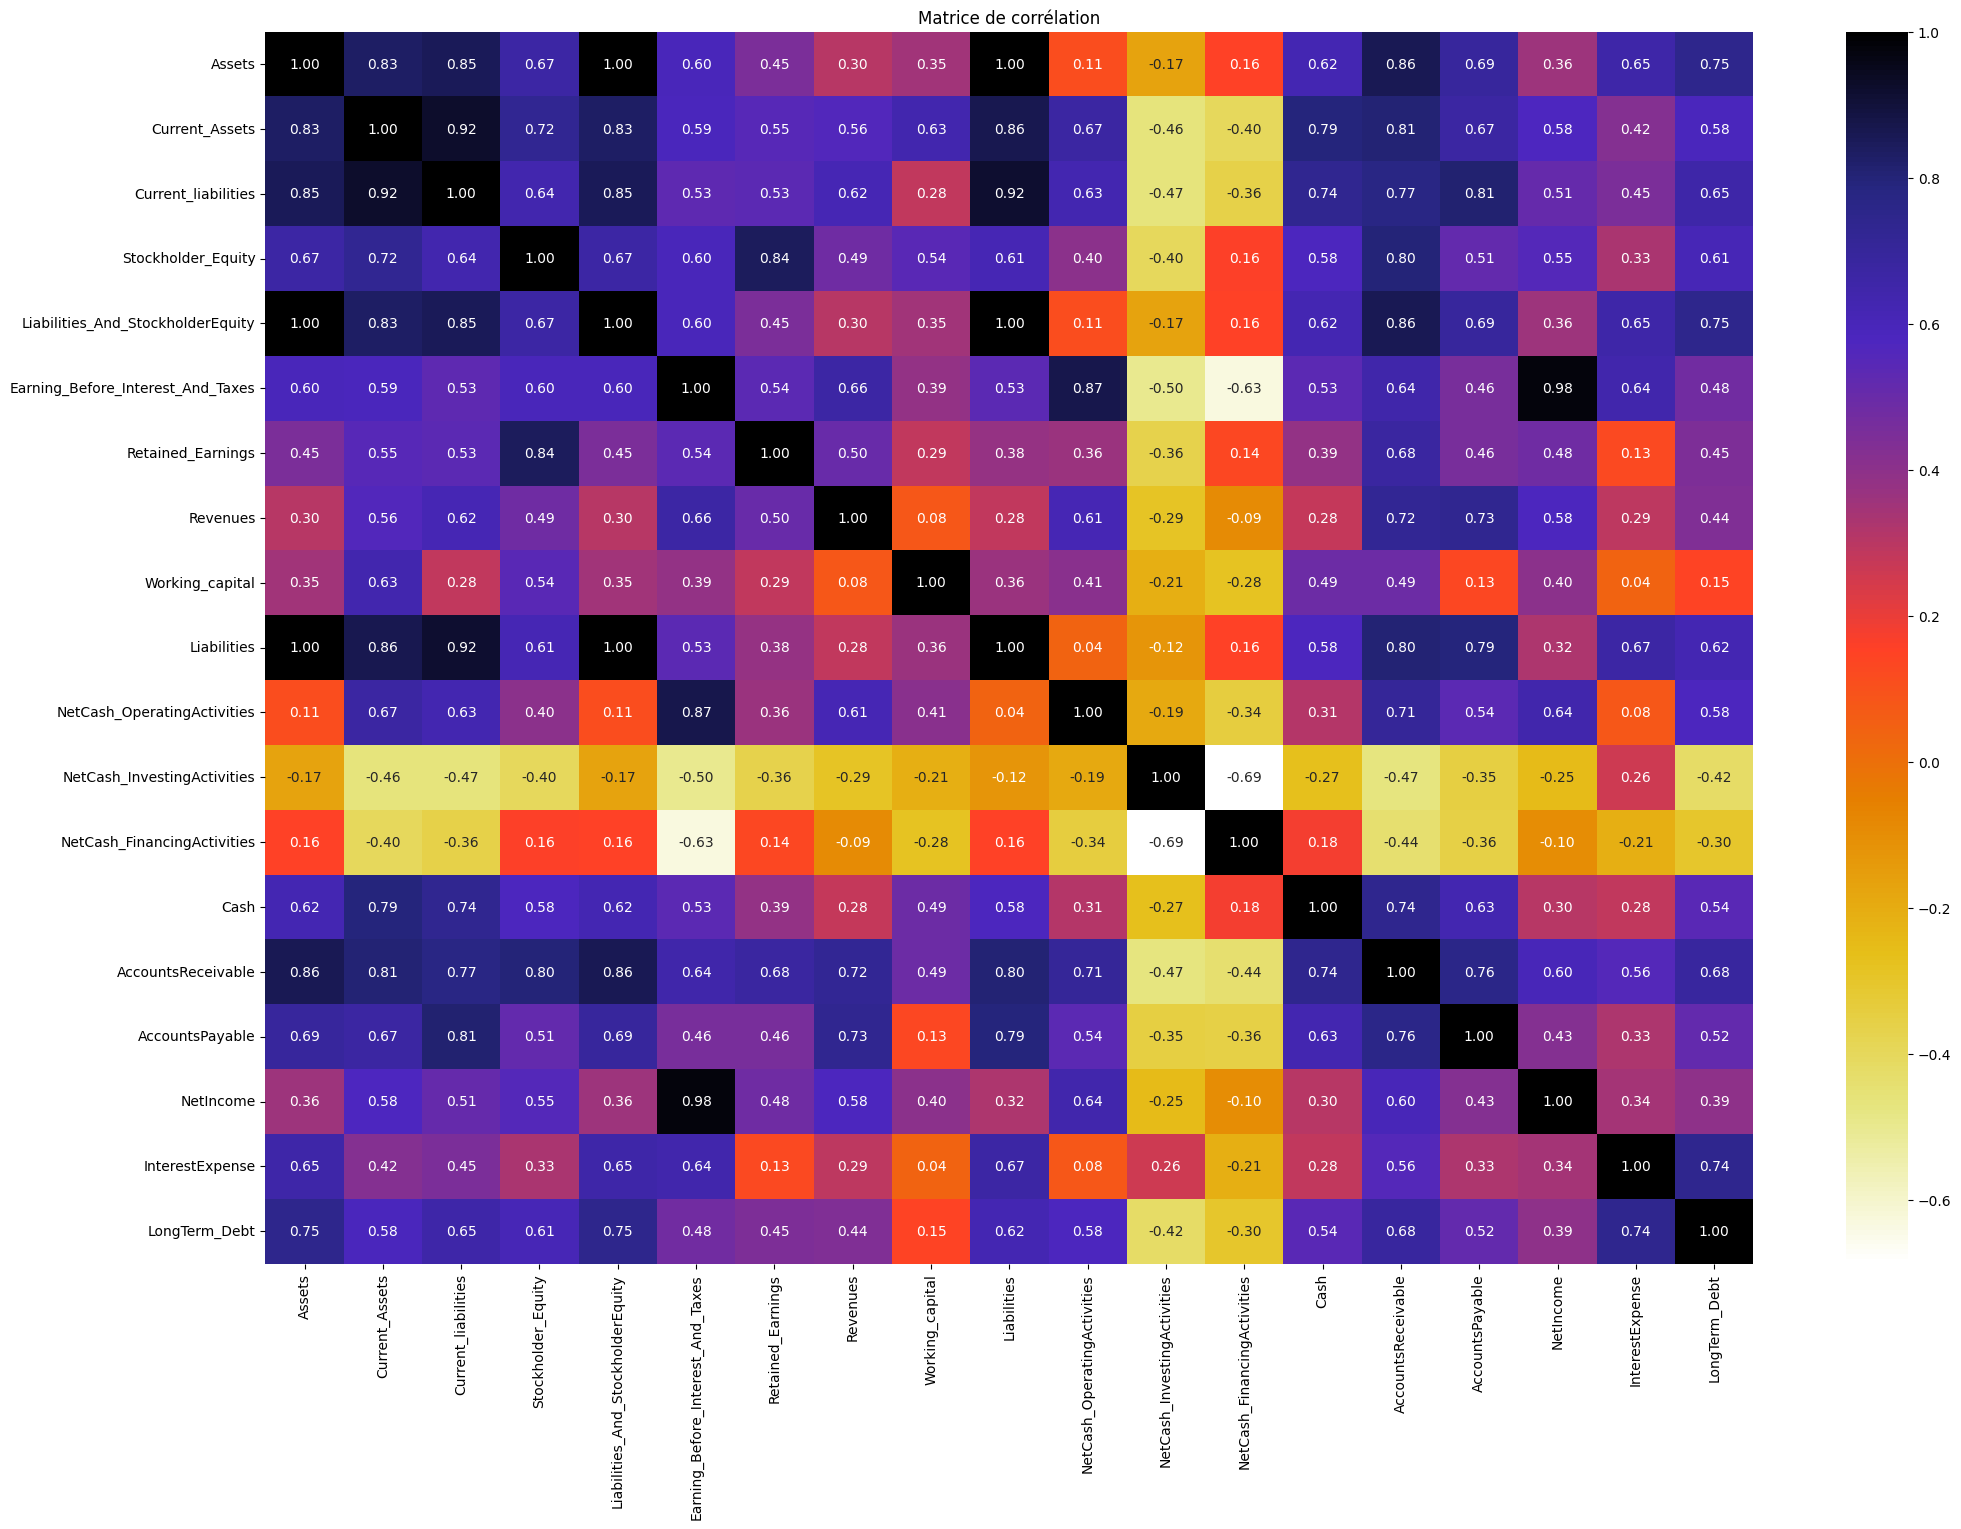

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
matrice_correlation = X.corr()

# Set the figure size (width, height) in inches to a larger size
plt.figure(figsize=(24, 16))  # Increased size for a bigger heatmap

# Plot the heatma
sns.heatmap(matrice_correlation, annot=True, cmap=plt.cm.CMRmap_r, fmt=".2f")

# Set the title
plt.title('Matrice de corrélation')

# Show the plot
plt.show()

In [43]:
# Compute the correlation matrix of features
corr_matrix = X_train.corr()

# Compute correlation of features with the target
target_corr = X_train.apply(lambda x: np.corrcoef(x, y_train)[0, 1])

# Set the threshold for high correlation
threshold = 0.8

# Function to find highly correlated groups
def find_highly_correlated_groups(corr_matrix, threshold):
    correlated_groups = []
    visited = set()  # Track features we've already grouped
    features = corr_matrix.columns
    
    for i in range(len(features)):
        if features[i] not in visited:
            # Find features highly correlated with the current feature
            current_group = [features[i]]
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    current_group.append(features[j])
                    visited.add(features[j])
            
            if len(current_group) > 1:  # Only store groups of 2 or more correlated features
                correlated_groups.append(current_group)
    
    return correlated_groups

# Get highly correlated groups of features
highly_correlated_groups = find_highly_correlated_groups(corr_matrix, threshold)

# Function to drop all features except the one most correlated with the target
def find_features_to_drop(groups, target_corr):
    features_to_drop = []
    
    for group in groups:
        # Find the feature in the group that has the highest correlation with the target
        best_feature = max(group, key=lambda x: abs(target_corr[x]))
        
        # Add all other features from the group to the drop list
        for feature in group:
            if feature != best_feature:
                features_to_drop.append(feature)
    
    return features_to_drop

# Identify features to drop based on correlation with the target
features_to_drop = find_features_to_drop(highly_correlated_groups, target_corr)

# Print the features to drop
print(f"Features to drop: {features_to_drop}")

# Drop the selected features from X_train and X_test
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Proceed with training your model on the reduced dataset


Features to drop: ['Assets', 'Current_Assets', 'Current_liabilities', 'Liabilities_And_StockholderEquity', 'Liabilities', 'NetCash_OperatingActivities', 'NetIncome', 'R7', 'R6']


### 2) Feature Selection with Spearman’s correlation coefficient


<Axes: >

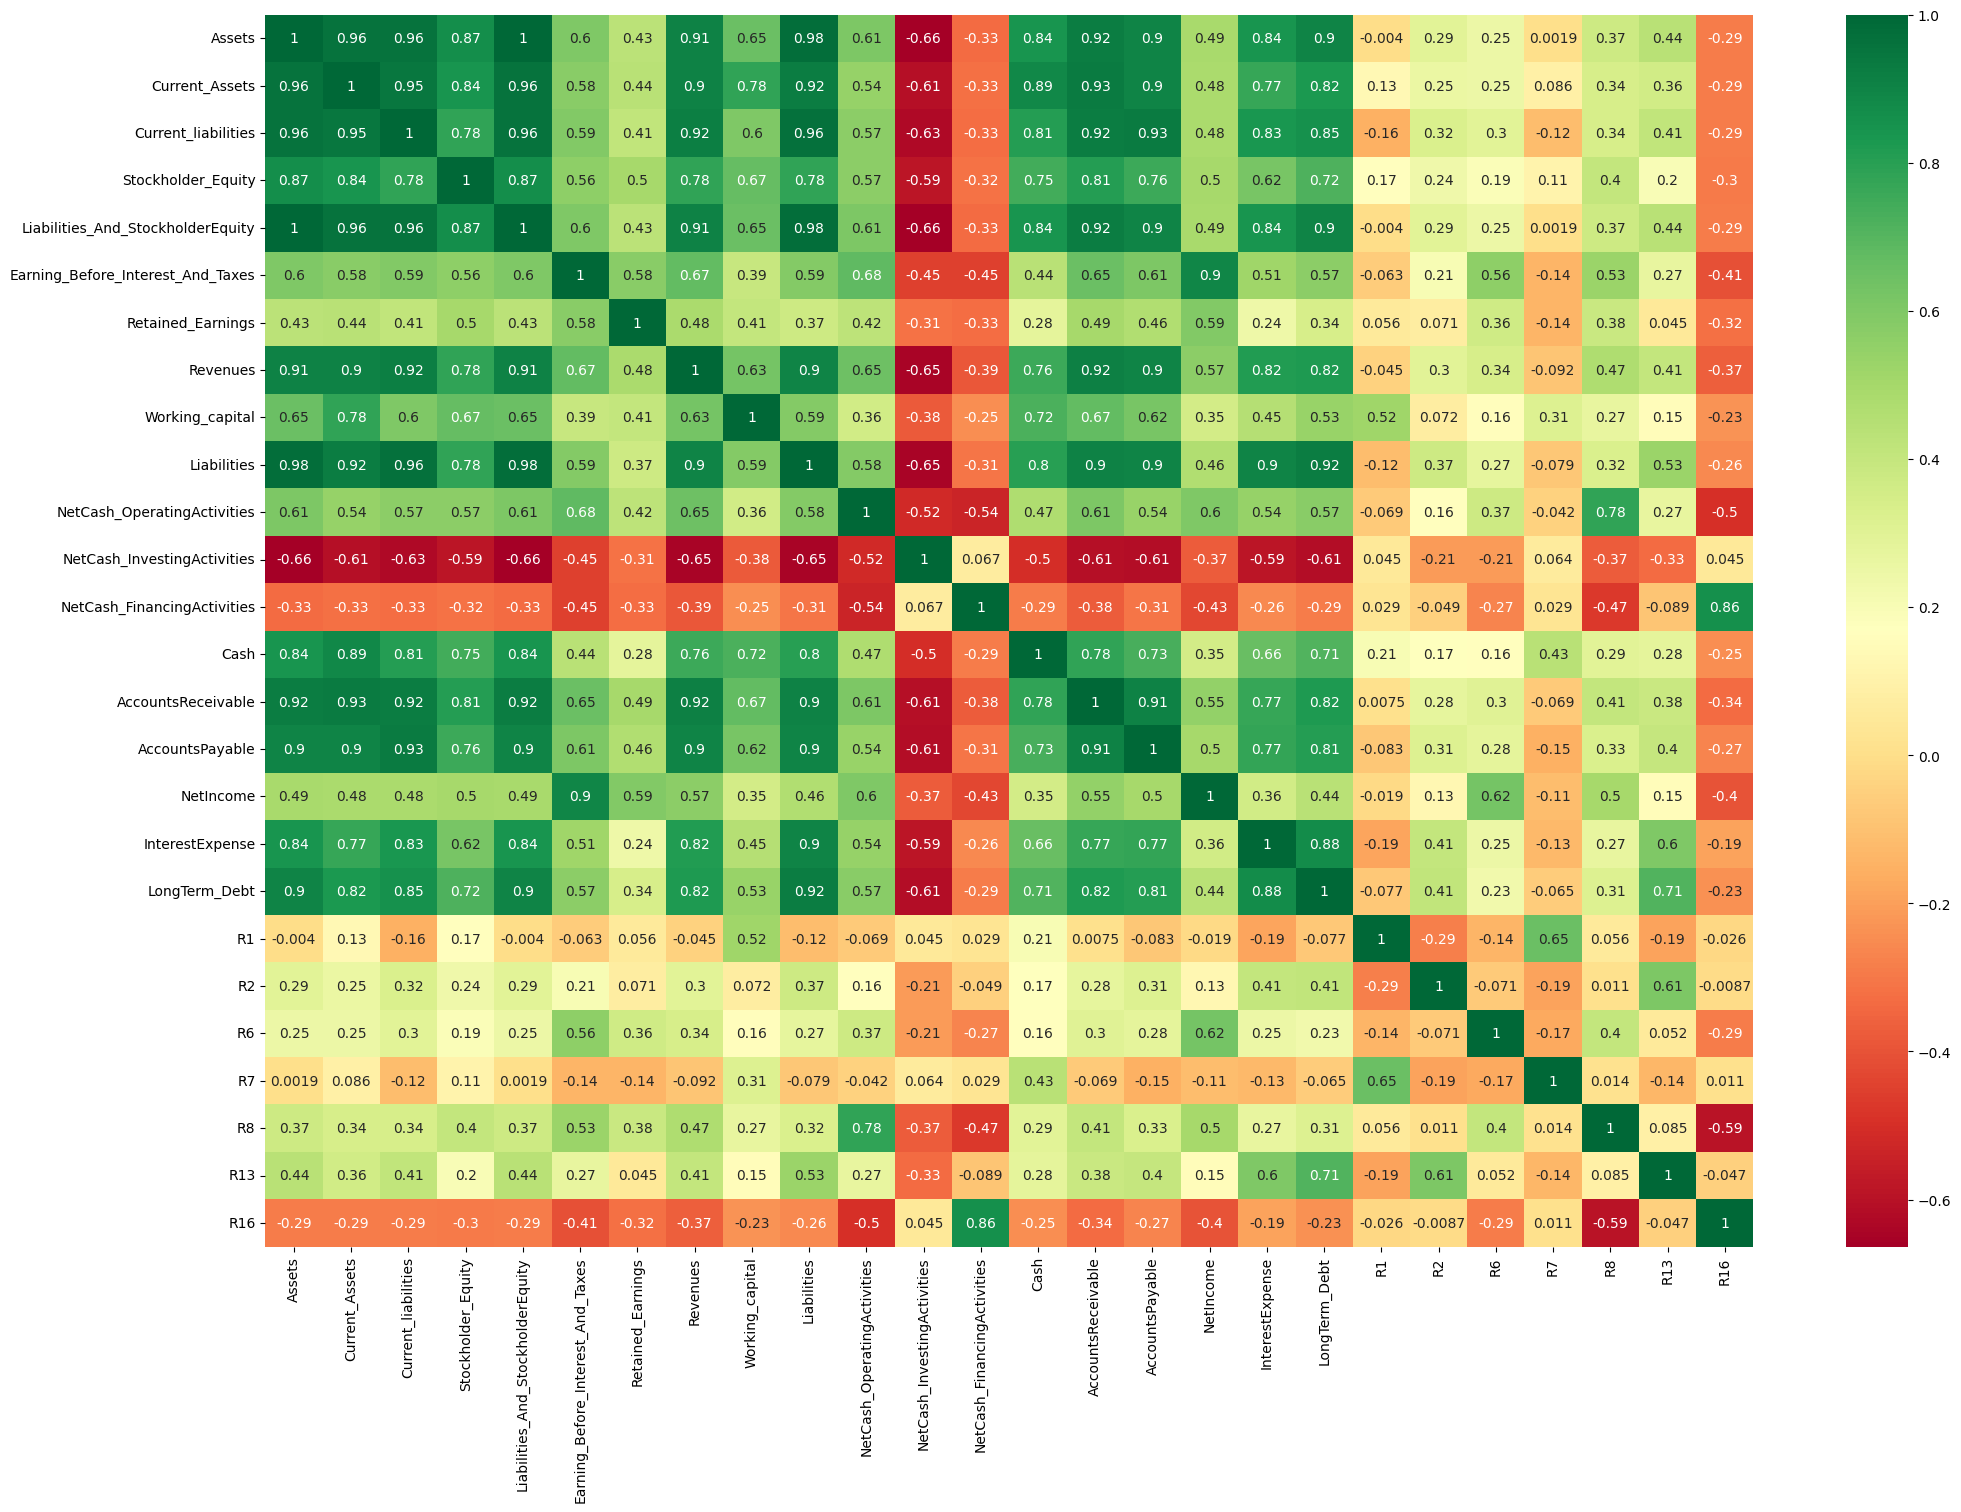

In [44]:
corr_matrix = X_train.corr(method='spearman')
plt.figure(figsize=(24,16))
sns.heatmap(corr_matrix,cmap = "RdYlGn",annot=True)

In [45]:

# Compute correlation of features with the target
target_corr = X_train.apply(lambda x: np.corrcoef(x, y_train)[0, 1])

# Set the threshold for high correlation
threshold = 0.8

# Function to find highly correlated groups
def find_highly_correlated_groups(corr_matrix, threshold):
    correlated_groups = []
    visited = set()  # Track features we've already grouped
    features = corr_matrix.columns
    
    for i in range(len(features)):
        if features[i] not in visited:
            # Find features highly correlated with the current feature
            current_group = [features[i]]
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    current_group.append(features[j])
                    visited.add(features[j])
            
            if len(current_group) > 1:  # Only store groups of 2 or more correlated features
                correlated_groups.append(current_group)
    
    return correlated_groups

# Get highly correlated groups of features
highly_correlated_groups = find_highly_correlated_groups(corr_matrix, threshold)

# Function to drop all features except the one most correlated with the target
def find_features_to_drop(groups, target_corr):
    features_to_drop = []
    
    for group in groups:
        # Find the feature in the group that has the highest correlation with the target
        best_feature = max(group, key=lambda x: abs(target_corr[x]))
        
        # Add all other features from the group to the drop list
        for feature in group:
            if feature != best_feature:
                features_to_drop.append(feature)
    
    return features_to_drop

# Identify features to drop based on correlation with the target
features_to_drop = find_features_to_drop(highly_correlated_groups, target_corr)

# Print the features to drop
print(f"Features to drop: {features_to_drop}")

# Drop the selected features from X_train and X_test
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Proceed with training your model on the reduced dataset


Features to drop: ['Assets', 'Current_Assets', 'Current_liabilities', 'Stockholder_Equity', 'Liabilities_And_StockholderEquity', 'Revenues', 'Liabilities', 'Cash', 'AccountsPayable', 'InterestExpense', 'LongTerm_Debt', 'NetIncome', 'R16']


In [46]:
# Features to drop from Pearson
features_to_drop_pearson = ['Assets', 'Current_Assets', 'Current_liabilities', 
                             'Liabilities_And_StockholderEquity', 'Liabilities', 
                             'Earning_Before_Interest_And_Taxes', 'NetCash_OperatingActivities']
Features to drop: ['Assets', 'Current_Assets', 'Current_liabilities', 'Liabilities_And_StockholderEquity', 'Liabilities', 'Earning_Before_Interest_And_Taxes', 'NetCash_OperatingActivities', 'R7', 'R6']
# Features to drop from Spearman
features_to_drop_spearman = ['Assets', 'Current_Assets', 'Current_liabilities', 
                              'Liabilities_And_StockholderEquity', 'Revenues', 
                              'Liabilities', 'Cash', 'AccountsReceivable', 
                              'AccountsPayable', 'InterestExpense', 
                              'LongTerm_Debt', 'Earning_Before_Interest_And_Taxes']
Features to drop: ['Assets', 'Current_Assets', 'Current_liabilities', 'Liabilities_And_StockholderEquity', 'Revenues', 'Liabilities', 'Cash', 'AccountsReceivable', 'AccountsPayable', 'InterestExpense', 'LongTerm_Debt', 'Earning_Before_Interest_And_Taxes', 'R16']

# Convert to sets for easier comparison
set_pearson = set(features_to_drop_pearson)
set_spearman = set(features_to_drop_spearman)

# Find unique features
unique_to_pearson = set_pearson - set_spearman
unique_to_spearman = set_spearman - set_pearson
overlapping_features = set_pearson & set_spearman# Combine all features, including unique and overlapping
all_features_to_drop = unique_to_pearson.union(unique_to_spearman).union(overlapping_features)

# Print results
print(f"Unique features to Pearson: {unique_to_pearson}")
print(f"Unique features to Spearman: {unique_to_spearman}")
print(f"Overlapping features: {overlapping_features}")
print(f"All features to drop: {all_features_to_drop}")

SyntaxError: invalid syntax (4074488588.py, line 5)

## **Decision**

In [52]:
# # Drop features from the training DataFrame (assuming X_train is your training DataFrame)
# X_train = X_train.drop(columns=all_features_to_drop, errors='ignore')

# # Drop features from the test DataFrame (assuming X_test is your test DataFrame)
# X_test = X_test.drop(columns=all_features_to_drop, errors='ignore')

# # Check the resulting DataFrames
# print("Training DataFrame after dropping features:")
# print(X_train.head())

# print("Test DataFrame after dropping features:")
# print(X_test.head())

### ** Statistcal Methods  **

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5670, 26)
(1372, 26)
(5670,)
(1372,)


### 1) Feature Selection for Classification Problem using Mutual Information(MI)


In [54]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#id4

In [55]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00738274, 0.00723698, 0.00470644, 0.01173981, 0.00738274,
       0.00643381, 0.01048826, 0.00667799, 0.01040455, 0.01093266,
       0.00408363, 0.00432291, 0.00565142, 0.00813696, 0.00917435,
       0.00986965, 0.00525826, 0.00639959, 0.0168421 , 0.01065108,
       0.00907539, 0.00511297, 0.00729373, 0.00115641, 0.00851516,
       0.00503197])

In [56]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LongTerm_Debt                        0.016842
Stockholder_Equity                   0.011740
Liabilities                          0.010933
R1                                   0.010651
Retained_Earnings                    0.010488
Working_capital                      0.010405
AccountsPayable                      0.009870
AccountsReceivable                   0.009174
R2                                   0.009075
R13                                  0.008515
Cash                                 0.008137
Assets                               0.007383
Liabilities_And_StockholderEquity    0.007383
R7                                   0.007294
Current_Assets                       0.007237
Revenues                             0.006678
Earning_Before_Interest_And_Taxes    0.006434
InterestExpense                      0.006400
NetCash_FinancingActivities          0.005651
NetIncome                            0.005258
R6                                   0.005113
R16                               

<Axes: >

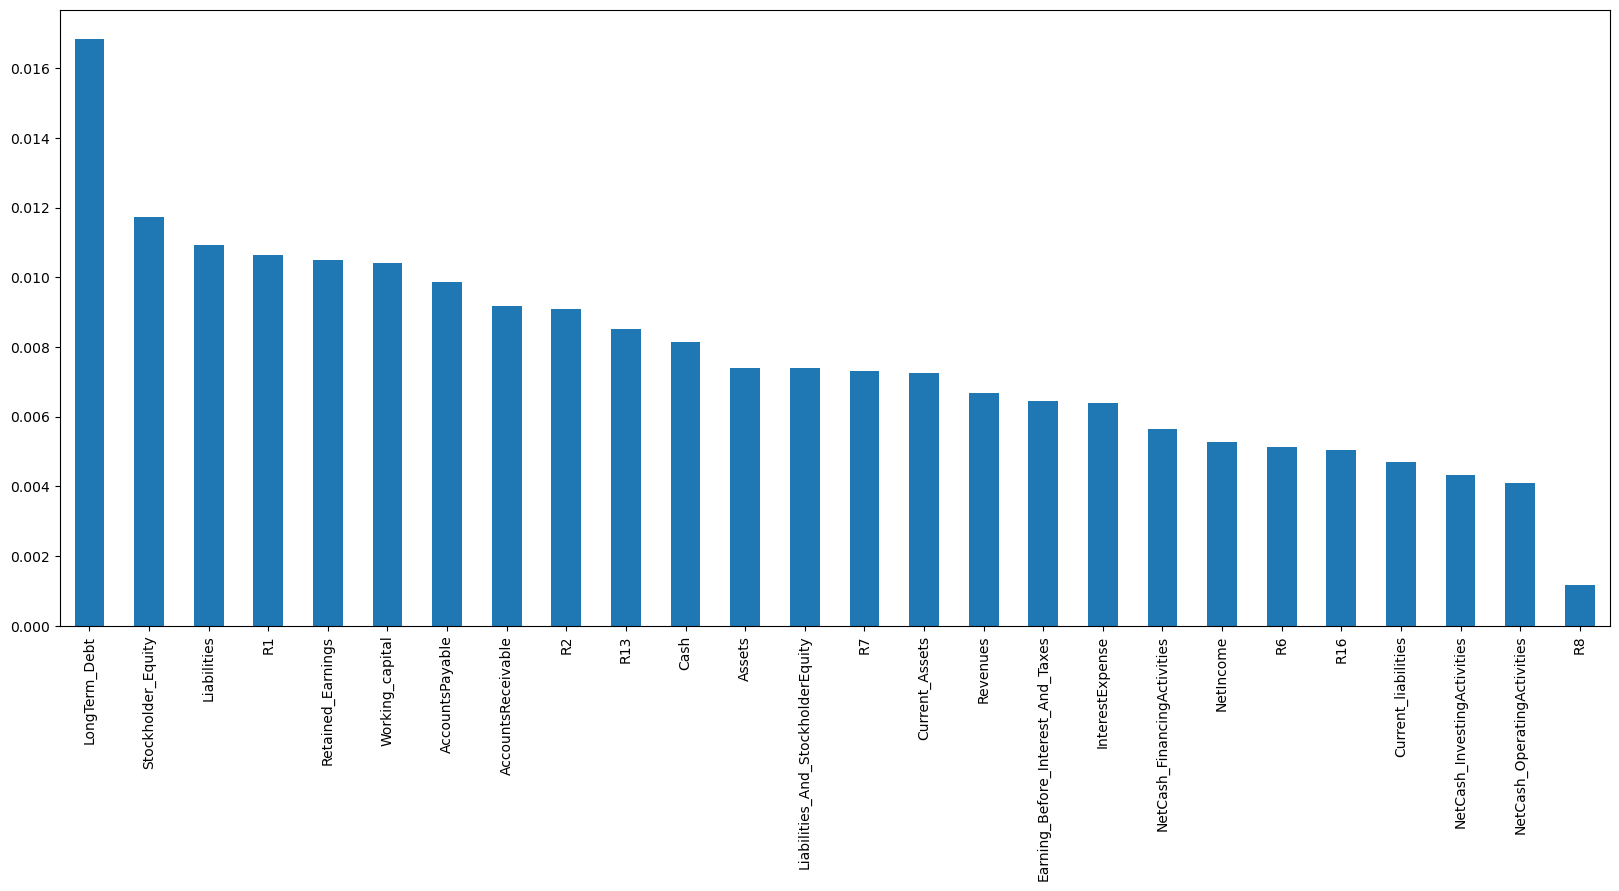

In [57]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [58]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Stockholder_Equity', 'Retained_Earnings', 'Liabilities',
       'LongTerm_Debt', 'R1'],
      dtype='object')

In [59]:
# Index(['Stockholder_Equity', 'Retained_Earnings', 'Working_capital',
#        'Liabilities', 'LongTerm_Debt'],
#       dtype='object')

### **Wrapper Methods** 


### ** Forword selection  **

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5670, 26)
(1372, 26)
(5670,)
(1372,)


## **Balancing the data**

## undersampling

C:\Users\yosra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yosra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yosra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yosra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

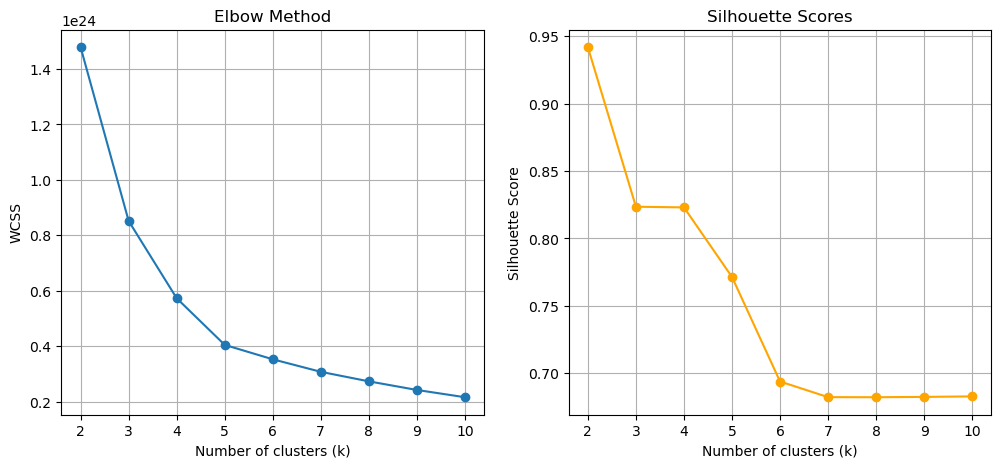

C:\Users\yosra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yosra\AppData\Local\Temp\ipykernel_5492\2371233704.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


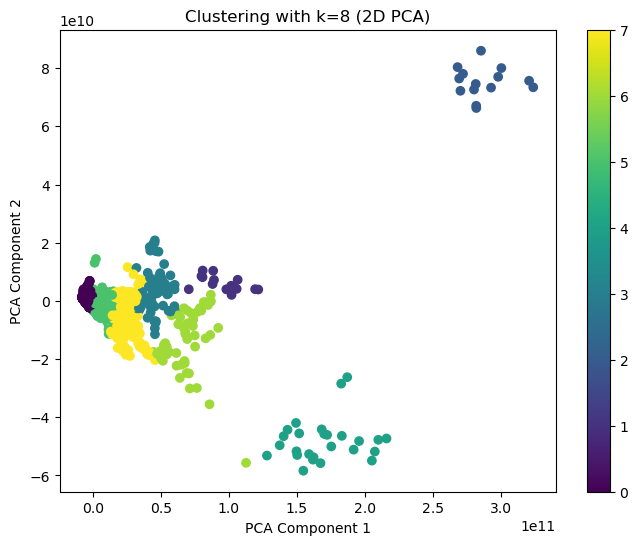

Cluster Cluster_2 has only 14 samples, not enough to undersample to 25.
Cluster Cluster_3 has only 14 samples, not enough to undersample to 25.

Final Undersampled DataFrame:
         Assets  Current_Assets  Current_liabilities  Stockholder_Equity  \
0  2.264798e+09    1.131933e+09          477116000.0        1.376312e+09   
1  1.736171e+09    6.645310e+08          462108000.0        7.358650e+08   
2  1.964100e+07    1.408300e+07           12542000.0        2.220000e+06   
3  1.681229e+09    5.968120e+08           96304000.0        9.415370e+08   
4  5.524600e+07    3.311100e+07           13034000.0        3.145400e+07   

   Liabilities_And_StockholderEquity  Earning_Before_Interest_And_Taxes  \
0                       2.264798e+09                        103000000.0   
1                       1.736171e+09                        140836000.0   
2                       1.964100e+07                           476000.0   
3                       1.681229e+09                       -10773600

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Separate successful and bankrupt datasets
X_train_successful = X_train[y_train == 0]
y_train_successful = y_train[y_train == 0]

X_train_ban = X_train[y_train == 1]
y_train_ban = y_train[y_train == 1]

# Perform KMeans clustering on successful data
X = X_train_successful

# Elbow Method and Silhouette Scores to find best k
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow and Silhouette Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Select elbow_k (manually set or through elbow detection)
elbow_k = 8
kmeans = KMeans(n_clusters=elbow_k, random_state=0)
X['Cluster'] = kmeans.fit_predict(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Cluster'], cmap='viridis')
plt.title(f'Clustering with k={elbow_k} (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Creating clustered dataframes
clustered_data = {}
for cluster in range(elbow_k):
    clustered_data[f'Cluster_{cluster + 1}'] = X[X['Cluster'] == cluster]

# Set samples per cluster for undersampling
total_samples = 200
samples_per_cluster = total_samples // elbow_k

# Collect undersampled data and indices
undersampled_dfs = []
undersampled_indices = []

for key, df in clustered_data.items():
    if df.shape[0] >= samples_per_cluster:
        undersampled_df = df.sample(n=samples_per_cluster, random_state=0)
        undersampled_dfs.append(undersampled_df)
        undersampled_indices.extend(undersampled_df.index.tolist())
    else:
        print(f"Cluster {key} has only {df.shape[0]} samples, not enough to undersample to {samples_per_cluster}.")

# Combine undersampled DataFrames and remove 'Cluster' column
X_train_u = pd.concat(undersampled_dfs, ignore_index=True).drop(columns=['Cluster'])

# Combine undersampled successful data with bankrupt data
X_train = pd.concat([X_train_ban, X_train_u], ignore_index=True)

# Filter y_train using the collected indices and combine with bankrupt y_train
y_train_u = y_train_successful.loc[undersampled_indices].reset_index(drop=True)
y_train = pd.concat([y_train_ban, y_train_u], ignore_index=True)

# Display the final undersampled DataFrame
print("\nFinal Undersampled DataFrame:")
print(X_train_u.head())
print(f"Total rows in final DataFrame: {X_train.shape[0]}")

print("\nCorresponding y_train values:")
print(y_train_u.head())
print(f"Total rows in final y_train DataFrame: {y_train.shape[0]}")


In [64]:
print(y_train.value_counts())


is_bankrupt
0    150
1     37
Name: count, dtype: int64


In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 26)
(1372, 26)
(187,)
(1372,)


## Oversampling 

### Apply SMOTE


In [66]:
# #!pip install imbalanced-learn

# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

### Apply ADASYN

In [67]:
from imblearn.over_sampling import ADASYN


# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train, y_train= adasyn.fit_resample(X_train, y_train)

In [68]:
print(y_train.value_counts())


is_bankrupt
1    150
0    150
Name: count, dtype: int64


# Modeling

## model trainer

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate classification models
def evaluate_classification_model(true, predicted, predicted_proba=None):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    if predicted_proba is not None:
        roc_auc = roc_auc_score(true, predicted_proba)
    else:
        roc_auc = None  # SVC without probability estimation won't have ROC AUC
    return accuracy, precision, recall, f1, roc_auc

In [70]:
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [72]:
# Dictionary of classification models including SVC
models = {
    "Logistic Regression": LogisticRegression(),
    # "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Classifier": SVC(probability=True)  # Enabling probability=True for ROC AUC
}
# "CatBoost Classifier": CatBoostClassifier(verbose=False),
#     "AdaBoost Classifier": AdaBoostClassifier(),
model_list = []
roc_auc_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Handling models with/without predict_proba
    try:
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # For SVC, we use decision_function for ROC AUC score
        if hasattr(model, "decision_function"):
            y_train_pred_proba = model.decision_function(X_train)
            y_test_pred_proba = model.decision_function(X_test)
        else:
            y_train_pred_proba = None
            y_test_pred_proba = None

    # Evaluate Train and Test dataset
    model_train_acc, model_train_prec, model_train_rec, model_train_f1, model_train_roc_auc = evaluate_classification_model(y_train, y_train_pred, y_train_pred_proba)
    model_test_acc, model_test_prec, model_test_rec, model_test_f1, model_test_roc_auc = evaluate_classification_model(y_test, y_test_pred, y_test_pred_proba)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- Precision: {:.4f}".format(model_train_prec))
    print("- Recall: {:.4f}".format(model_train_rec))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    if model_train_roc_auc is not None:
        print("- ROC AUC Score: {:.4f}".format(model_train_roc_auc))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- Precision: {:.4f}".format(model_test_prec))
    print("- Recall: {:.4f}".format(model_test_rec))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    if model_test_roc_auc is not None:
        print("- ROC AUC Score: {:.4f}".format(model_test_roc_auc))
    roc_auc_list.append(model_test_roc_auc)

    print('='*35)
    print('\n')

C:\Users\yosra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.9933
- Precision: 0.9933
- Recall: 0.9933
- F1 Score: 0.9933
- ROC AUC Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9052
- Precision: 0.0780
- Recall: 1.0000
- F1 Score: 0.1447
- ROC AUC Score: 0.9566


Decision Tree Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8965
- Precision: 0.0662
- Recall: 0.9091
- F1 Score: 0.1235
- ROC AUC Score: 0.9027


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8819
- Precision: 0.0585
- Recall: 0.9091
- F1 Score: 0.1099
- ROC AUC Score: 0.9702


XGBClassifier
Model perform

C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8967
- Precision: 0.8362
- Recall: 0.9867
- F1 Score: 0.9052
- ROC AUC Score: 0.9589
----------------------------------
Model performance for Test set
- Accuracy: 0.1837
- Precision: 0.0097
- Recall: 1.0000
- F1 Score: 0.0193
- ROC AUC Score: 0.8502




## model trainer with hyperparameters

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate classification models
def evaluate_classification_model(true, predicted, predicted_proba=None):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    if predicted_proba is not None:
        roc_auc = roc_auc_score(true, predicted_proba)
    else:
        roc_auc = None  # SVC without probability estimation won't have ROC AUC
    return accuracy, precision, recall, f1, roc_auc


# Dictionary of classification models with basic hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    # "K-Neighbors Classifier": {
    #     'n_neighbors': [3, 5, 7],
    #     'weights': ['uniform', 'distance']
    # },
    "Decision Tree Classifier": {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest Classifier": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10]
    },
    "XGBClassifier": {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200]
    },
    # "CatBoost Classifier": {
    #     'depth': [3, 6, 10],
    #     'learning_rate': [0.01, 0.1, 0.2]
    # },
    # "AdaBoost Classifier": {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.01, 0.1, 0.5]
    # },
    "Support Vector Classifier": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        
        'probability': [True]  # Ensure probability=True for ROC AUC calculation
    }
}

models = {
    "Logistic Regression": LogisticRegression(),
   # "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    # "CatBoost Classifier": CatBoostClassifier(verbose=False),
    # "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier": SVC()  # Probability will be set in GridSearch
}

model_list = []
roc_auc_list = []

# Perform hyperparameter tuning and evaluation for each model
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    param_grid = param_grids[model_name]
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Use the best model found by GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Handling models with/without predict_proba
    try:
        y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
        y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # For SVC, we use decision_function for ROC AUC score
        if hasattr(best_model, "decision_function"):
            y_train_pred_proba = best_model.decision_function(X_train)
            y_test_pred_proba = best_model.decision_function(X_test)
        else:
            y_train_pred_proba = None
            y_test_pred_proba = None

    # Evaluate Train and Test dataset
    model_train_acc, model_train_prec, model_train_rec, model_train_f1, model_train_roc_auc = evaluate_classification_model(y_train, y_train_pred, y_train_pred_proba)
    model_test_acc, model_test_prec, model_test_rec, model_test_f1, model_test_roc_auc = evaluate_classification_model(y_test, y_test_pred, y_test_pred_proba)

    print(f"Best model: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_acc:.4f}")
    print(f"- Precision: {model_train_prec:.4f}")
    print(f"- Recall: {model_train_rec:.4f}")
    print(f"- F1 Score: {model_train_f1:.4f}")
    if model_train_roc_auc is not None:
        print(f"- ROC AUC Score: {model_train_roc_auc:.4f}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Accuracy: {model_test_acc:.4f}")
    print(f"- Precision: {model_test_prec:.4f}")
    print(f"- Recall: {model_test_rec:.4f}")
    print(f"- F1 Score: {model_test_f1:.4f}")
    if model_test_roc_auc is not None:
        print(f"- ROC AUC Score: {model_test_roc_auc:.4f}")
    roc_auc_list.append(model_test_roc_auc)

    print('=' * 35)
    print('\n')


C:\Users\yosra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best model: Logistic Regression
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Model performance for Training set
- Accuracy: 0.9967
- Precision: 1.0000
- Recall: 0.9933
- F1 Score: 0.9967
- ROC AUC Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9045
- Precision: 0.0775
- Recall: 1.0000
- F1 Score: 0.1438
- ROC AUC Score: 0.9622


Best model: Decision Tree Classifier
Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Model performance for Training set
- Accuracy: 0.9867
- Precision: 0.9740
- Recall: 1.0000
- F1 Score: 0.9868
- ROC AUC Score: 0.9867
----------------------------------
Model performance for Test set
- Accuracy: 0.8222
- Precision: 0.0395
- Recall: 0.9091
- F1 Score: 0.0758
- ROC AUC Score: 0.8653


Best model: Random Forest Classifier
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- ROC AUC Score: 1.000

C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best model: XGBClassifier
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Model performance for Training set
- Accuracy: 0.9967
- Precision: 0.9934
- Recall: 1.0000
- F1 Score: 0.9967
- ROC AUC Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.8586
- Precision: 0.0493
- Recall: 0.9091
- F1 Score: 0.0935
- ROC AUC Score: 0.9608


Best model: Support Vector Classifier
Best parameters: {'C': 0.1, 'kernel': 'linear', 'probability': True}
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9023
- Precision: 0.0759
- Recall: 1.0000
- F1 Score: 0.1410
- ROC AUC Score: 0.9580




**1- Random Forest**

A powerful ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and robustness.

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [75]:
# ================== Random Forest without Feature Selection ==================
# Train a Random Forest classifier without feature selection
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred_rf_w = rf_w.predict(X_test)
accuracy_rf_w = accuracy_score(y_test, y_pred_rf_w)
print(f"Random Forest Accuracy (without feature selection): {accuracy_rf_w:.4f}")

Random Forest Accuracy (without feature selection): 0.8732


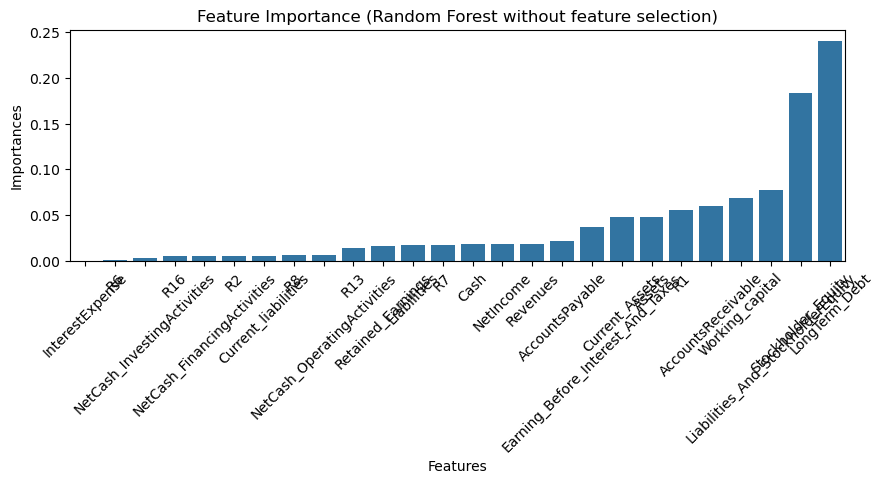

In [76]:
# ================== Feature Importance (Without Feature Selection) ================
# Get feature importance from the trained Random Forest model
importances = rf_w.feature_importances_

# Create a DataFrame for visualization
final_df = pd.DataFrame({"Features": X_train.columns, "Importances": importances})
final_df.set_index('Importances')

# Sort features by importance in ascending order for better visualization
final_df = final_df.sort_values('Importances')

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)
sns.barplot(x="Features", y="Importances", data=final_df)
plt.title("Feature Importance (Random Forest without feature selection)")
plt.show()

In [77]:
# ================== Random Forest with RFE (Feature Selection) ==================
# Define a new Random Forest model for RFE (Recursive Feature Elimination)
model_tree = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE to select the top 7 most important features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=8, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
X_test_rfe_tree = sel_rfe_tree.transform(X_test)

# Print selected features and their rankings
print(f"Selected Features Support: {sel_rfe_tree.get_support()}")
print(f"Feature Rankings: {sel_rfe_tree.ranking_}")

# Train a Random Forest model using RFE-selected features
rf_rfe = RandomForestClassifier(random_state=42)
rf_rfe.fit(X_train_rfe_tree, y_train)

# Make predictions and evaluate accuracy
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe_tree)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)
print(f"Random Forest Accuracy (with RFE): {accuracy_rf_rfe:.4f}")

Selected Features Support: [ True False False  True  True  True False False  True False False False
 False False  True  True False False  True False False False False False
 False False]
Feature Rankings: [ 1  4 11  1  1  1  7 13  1 12 10  9 14  5  1  1  8 19  1  2 17 15  6 18
  3 16]
Random Forest Accuracy (with RFE): 0.8455


In [78]:
# find the number of selected features with the help of the following script:
selected_cols = [column for column in X_train.columns if column in X_train.columns[sel_rfe_tree.get_support()]]
selected_cols

['Assets',
 'Stockholder_Equity',
 'Liabilities_And_StockholderEquity',
 'Earning_Before_Interest_And_Taxes',
 'Working_capital',
 'AccountsReceivable',
 'AccountsPayable',
 'LongTerm_Debt']

In [79]:
# ================== Hyperparameter Tuning on Selected Features ==================
# Perform Grid Search to tune hyperparameters on RFE-selected features
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf_rfe = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit the Grid Search model
grid_search_rf_rfe.fit(X_train_rfe_tree, y_train)

# Get the best parameters and the tuned model
best_params_rf_rfe = grid_search_rf_rfe.best_params_
tuned_rf_model_rfe = grid_search_rf_rfe.best_estimator_

# Evaluate the tuned model
y_pred_rf_rfe_tuned = tuned_rf_model_rfe.predict(X_test_rfe_tree)
accuracy_rf_rfe_tuned = accuracy_score(y_test, y_pred_rf_rfe_tuned)
print(f"Tuned Random Forest (with RFE) Accuracy: {accuracy_rf_rfe_tuned:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuned Random Forest (with RFE) Accuracy: 0.8404


**2- Decision Tree**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Baseline Decision Tree Accuracy: 0.9942
Baseline Decision Tree AUC: 0.7265
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Decision Tree parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross-validation AUC scores (Decision Tree): [0.90230906 0.96636323 0.71897579 0.86988211 0.79877044]
Mean Cross-validation AUC (Decision Tree): 0.8513
Tuned Decision Tree Accuracy: 0.9898
Tuned Decision Tree Precision: 0.2000
Tuned Decision Tree Recall: 0.0909
Tuned Decision Tree F1 Score: 0.1250
Tuned Decision Tree AUC: 0.8136


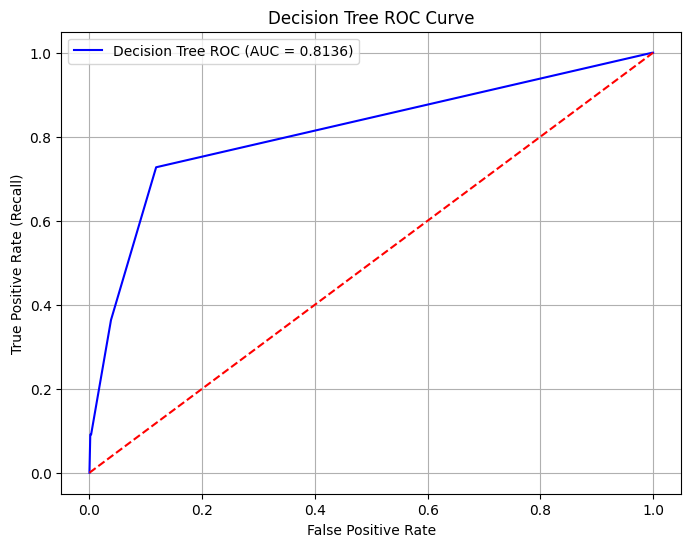

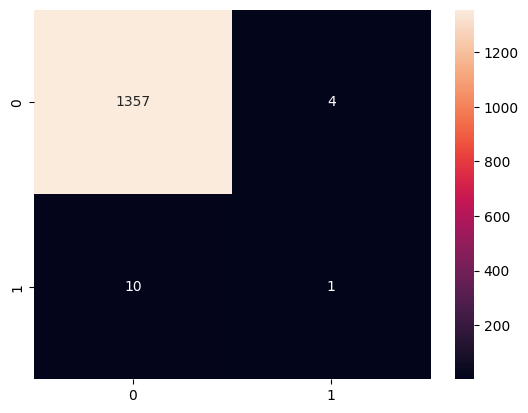

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Baseline Decision Tree model
baseline_dt_model = DecisionTreeClassifier(random_state=42)
baseline_dt_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline_dt = baseline_dt_model.predict(X_test)
y_pred_baseline_dt_proba = baseline_dt_model.predict_proba(X_test)[:, 1]

# Baseline model evaluation
accuracy_baseline_dt = accuracy_score(y_test, y_pred_baseline_dt)
auc_baseline_dt = roc_auc_score(y_test, y_pred_baseline_dt_proba)
print(f"Baseline Decision Tree Accuracy: {accuracy_baseline_dt:.4f}")
print(f"Baseline Decision Tree AUC: {auc_baseline_dt:.4f}")

# 2. Hyperparameter tuning with Grid Search for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV setup for Decision Tree
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search for Decision Tree
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
best_params_dt = grid_search_dt.best_params_
print(f"Best Decision Tree parameters found: {best_params_dt}")

# 3. Evaluate tuned model with cross-validation
tuned_dt_model = grid_search_dt.best_estimator_

# Cross-validation with the tuned Decision Tree model (5 folds)
cv_results_dt = cross_val_score(tuned_dt_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print(f"Cross-validation AUC scores (Decision Tree): {cv_results_dt}")
print(f"Mean Cross-validation AUC (Decision Tree): {cv_results_dt.mean():.4f}")

# 4. Final Decision Tree model and evaluation
tuned_dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = tuned_dt_model.predict(X_test)
y_pred_dt_proba = tuned_dt_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt_proba)

print(f"Tuned Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Tuned Decision Tree Precision: {precision_dt:.4f}")
print(f"Tuned Decision Tree Recall: {recall_dt:.4f}")
print(f"Tuned Decision Tree F1 Score: {f1_dt:.4f}")
print(f"Tuned Decision Tree AUC: {auc_dt:.4f}")

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree ROC (AUC = {auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid()
plt.show()

cm = confusion_matrix(y_test, y_pred_dt.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

**1- SVM**

Baseline SVM Accuracy: 0.1837
Baseline SVM AUC: 0.8502
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM parameters found: {'C': 10, 'degree': 3, 'kernel': 'poly'}
Cross-validation AUC scores (SVM): [0.78555556 1.         1.         1.         1.        ]
Mean Cross-validation AUC (SVM): 0.9571
Tuned SVM Accuracy: 0.0794
Tuned SVM Precision: 0.0086
Tuned SVM Recall: 1.0000
Tuned SVM F1 Score: 0.0171
Tuned SVM AUC: 0.8619


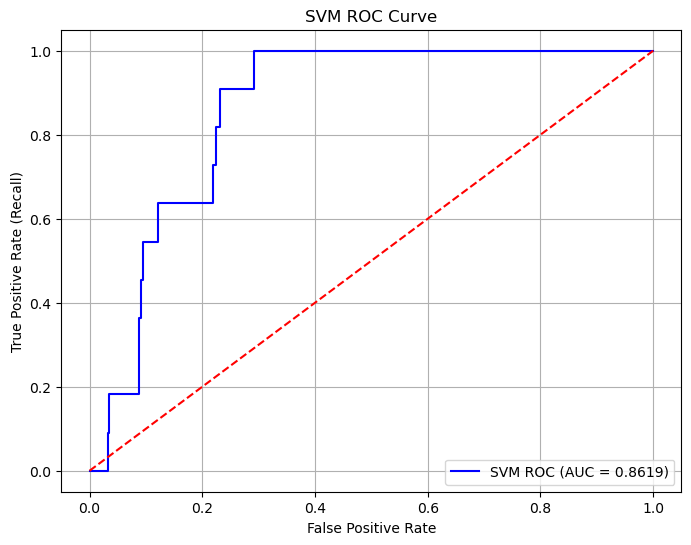

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Baseline SVM model
baseline_svm_model = SVC(random_state=42, probability=True)
baseline_svm_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline_svm = baseline_svm_model.predict(X_test)
y_pred_baseline_svm_proba = baseline_svm_model.predict_proba(X_test)[:, 1]

# Baseline model evaluation
accuracy_baseline_svm = accuracy_score(y_test, y_pred_baseline_svm)
auc_baseline_svm = roc_auc_score(y_test, y_pred_baseline_svm_proba)
print(f"Baseline SVM Accuracy: {accuracy_baseline_svm:.4f}")
print(f"Baseline SVM AUC: {auc_baseline_svm:.4f}")

# 2. Hyperparameter tuning with Grid Search for SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4]  # Only applicable for 'poly' kernel
# }
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly'],
    'degree': [2, 3]  
}

# GridSearchCV setup for SVM
grid_search_svm = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search for SVM
grid_search_svm.fit(X_train, y_train)

# Best parameters and model
best_params_svm = grid_search_svm.best_params_
print(f"Best SVM parameters found: {best_params_svm}")

# 3. Evaluate tuned model with cross-validation
tuned_svm_model = grid_search_svm.best_estimator_

# Cross-validation with the tuned SVM model (5 folds)
cv_results_svm = cross_val_score(tuned_svm_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print(f"Cross-validation AUC scores (SVM): {cv_results_svm}")
print(f"Mean Cross-validation AUC (SVM): {cv_results_svm.mean():.4f}")

# 4. Final SVM model and evaluation
tuned_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = tuned_svm_model.predict(X_test)
y_pred_svm_proba = tuned_svm_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm_proba)

print(f"Tuned SVM Accuracy: {accuracy_svm:.4f}")
print(f"Tuned SVM Precision: {precision_svm:.4f}")
print(f"Tuned SVM Recall: {recall_svm:.4f}")
print(f"Tuned SVM F1 Score: {f1_svm:.4f}")
print(f"Tuned SVM AUC: {auc_svm:.4f}")

# Plot ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM ROC (AUC = {auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('SVM ROC Curve')
plt.legend()
plt.grid()
plt.show()


**4-fully connected neural network**

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 24)                504       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,073
Trainable params: 2,073
Non-trainabl

43/43 [==============================] - 0s 1ms/step - loss: 1224371.1250 - accuracy: 0.8120
Test Accuracy: 81.20%
Test Loss: 1224371.125
43/43 [==============================] - 0s 843us/step


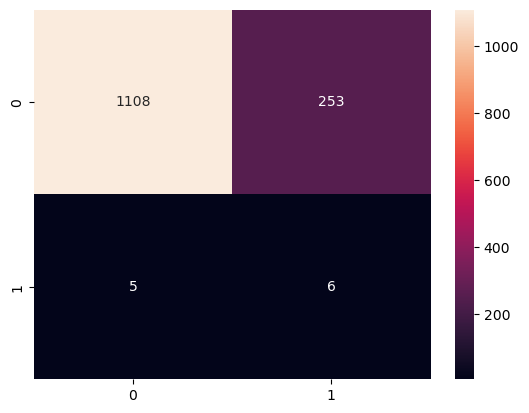

In [83]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

**5- XgBoost**

An implementation of gradient boosting specifically designed to be efficient and effective. It often performs better than other boosting methods.

C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:02:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Baseline Accuracy: 0.8834
Baseline AUC: 0.9551
Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:03:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}


C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:03:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:03:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:03:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yosra\anaconda3\lib\site-packages\

Cross-validation AUC scores: [0.94777778 1.         1.         1.         1.        ]
Mean Cross-validation AUC: 0.9896


C:\Users\yosra\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:03:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned Model Accuracy: 0.8797
Tuned Model Precision: 0.0625
Tuned Model Recall: 1.0000
Tuned Model F1 Score: 0.1176
Tuned Model AUC: 0.9709


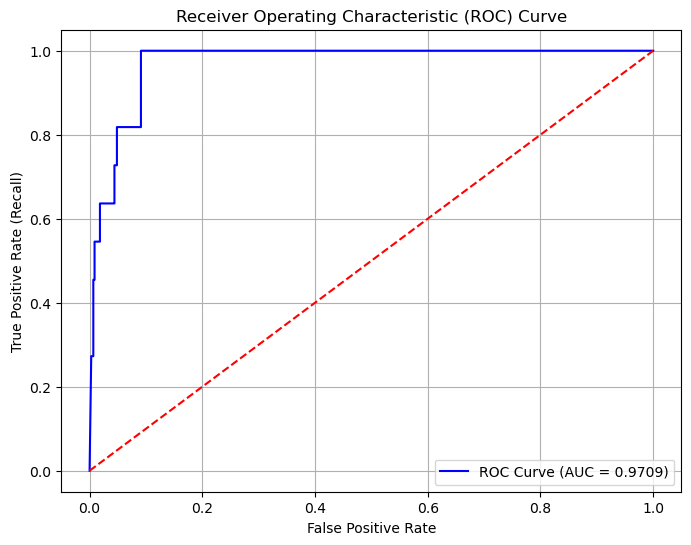

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Load your data (X_train, X_test, y_train, y_test)

# 1. Start with a baseline model
baseline_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)
baseline_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline = baseline_model.predict(X_test)
y_pred_baseline_proba = baseline_model.predict_proba(X_test)[:, 1]

# Baseline model evaluation
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
auc_baseline = roc_auc_score(y_test, y_pred_baseline_proba)
print(f"Baseline Accuracy: {accuracy_baseline:.4f}")
print(f"Baseline AUC: {auc_baseline:.4f}")

# 2. Hyperparameter tuning with Grid Search
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# 3. Evaluate tuned model with cross-validation
tuned_model = grid_search.best_estimator_

# Cross-validation with the tuned model (5 folds)
cv_results = cross_val_score(tuned_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print(f"Cross-validation AUC scores: {cv_results}")
print(f"Mean Cross-validation AUC: {cv_results.mean():.4f}")

# 4. Train final model on the full training data using best parameters
tuned_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = tuned_model.predict(X_test)
y_pred_proba = tuned_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Tuned Model Accuracy: {accuracy:.4f}")
print(f"Tuned Model Precision: {precision:.4f}")
print(f"Tuned Model Recall: {recall:.4f}")
print(f"Tuned Model F1 Score: {f1:.4f}")
print(f"Tuned Model AUC: {auc:.4f}")

# Plot ROC curve for tuned model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


**3- BaggingClassifier**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.


In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Baseline Bagging Classifier model
baseline_bagging_model = BaggingClassifier(random_state=42)
baseline_bagging_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline_bagging = baseline_bagging_model.predict(X_test)
y_pred_baseline_bagging_proba = baseline_bagging_model.predict_proba(X_test)[:, 1]

# Baseline model evaluation
accuracy_baseline_bagging = accuracy_score(y_test, y_pred_baseline_bagging)
auc_baseline_bagging = roc_auc_score(y_test, y_pred_baseline_bagging_proba)
print(f"Baseline Bagging Classifier Accuracy: {accuracy_baseline_bagging:.4f}")
print(f"Baseline Bagging Classifier AUC: {auc_baseline_bagging:.4f}")

# 2. Hyperparameter tuning with Grid Search for Bagging Classifier
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# GridSearchCV setup for Bagging Classifier
grid_search_bagging = GridSearchCV(
    estimator=BaggingClassifier(random_state=42),
    param_grid=param_grid_bagging,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search for Bagging Classifier
grid_search_bagging.fit(X_train, y_train)

# Best parameters and model
best_params_bagging = grid_search_bagging.best_params_
print(f"Best Bagging Classifier parameters found: {best_params_bagging}")

# 3. Evaluate tuned model with cross-validation
tuned_bagging_model = grid_search_bagging.best_estimator_

# Cross-validation with the tuned Bagging Classifier model (5 folds)
cv_results_bagging = cross_val_score(tuned_bagging_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print(f"Cross-validation AUC scores (Bagging Classifier): {cv_results_bagging}")
print(f"Mean Cross-validation AUC (Bagging Classifier): {cv_results_bagging.mean():.4f}")

# 4. Final Bagging Classifier model and evaluation
tuned_bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = tuned_bagging_model.predict(X_test)
y_pred_bagging_proba = tuned_bagging_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
auc_bagging = roc_auc_score(y_test, y_pred_bagging_proba)

print(f"Tuned Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Tuned Bagging Classifier Precision: {precision_bagging:.4f}")
print(f"Tuned Bagging Classifier Recall: {recall_bagging:.4f}")
print(f"Tuned Bagging Classifier F1 Score: {f1_bagging:.4f}")
print(f"Tuned Bagging Classifier AUC: {auc_bagging:.4f}")

# Plot ROC curve for Bagging Classifier
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_pred_bagging_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, color='blue', label=f'Bagging Classifier ROC (AUC = {auc_bagging:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Bagging Classifier ROC Curve')
plt.legend()
plt.grid()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Liabilities_And_StockholderEquity


**4- Extra Trees Classifier (Extremely Randomized Trees)**

Similar to a Random Forest, but with a key difference in how trees are constructed. In Extra Trees, both the selection of the split points and the features to split on are randomized, which can lead to better performance in some cases.

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

# 1. Baseline ExtraTrees Classifier model
baseline_extratree_model = ExtraTreesClassifier(random_state=42)
baseline_extratree_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline_extratree = baseline_extratree_model.predict(X_test)
y_pred_baseline_extratree_proba = baseline_extratree_model.predict_proba(X_test)[:, 1]

# Baseline model evaluation
accuracy_baseline_extratree = accuracy_score(y_test, y_pred_baseline_extratree)
auc_baseline_extratree = roc_auc_score(y_test, y_pred_baseline_extratree_proba)
print(f"Baseline ExtraTrees Classifier Accuracy: {accuracy_baseline_extratree:.4f}")
print(f"Baseline ExtraTrees Classifier AUC: {auc_baseline_extratree:.4f}")

# 2. Hyperparameter tuning with Grid Search for ExtraTrees Classifier
param_grid_extratree = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV setup for ExtraTrees Classifier
grid_search_extratree = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_grid=param_grid_extratree,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search for ExtraTrees Classifier
grid_search_extratree.fit(X_train, y_train)

# Best parameters and model
best_params_extratree = grid_search_extratree.best_params_
print(f"Best ExtraTrees Classifier parameters found: {best_params_extratree}")

# 3. Evaluate tuned model with cross-validation
tuned_extratree_model = grid_search_extratree.best_estimator_

# Cross-validation with the tuned ExtraTrees Classifier model (5 folds)
cv_results_extratree = cross_val_score(tuned_extratree_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print(f"Cross-validation AUC scores (ExtraTrees Classifier): {cv_results_extratree}")
print(f"Mean Cross-validation AUC (ExtraTrees Classifier): {cv_results_extratree.mean():.4f}")

# 4. Final ExtraTrees Classifier model and evaluation
tuned_extratree_model.fit(X_train, y_train)

# Make predictions
y_pred_extratree = tuned_extratree_model.predict(X_test)
y_pred_extratree_proba = tuned_extratree_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_extratree = accuracy_score(y_test, y_pred_extratree)
precision_extratree = precision_score(y_test, y_pred_extratree)
recall_extratree = recall_score(y_test, y_pred_extratree)
f1_extratree = f1_score(y_test, y_pred_extratree)
auc_extratree = roc_auc_score(y_test, y_pred_extratree_proba)

print(f"Tuned ExtraTrees Classifier Accuracy: {accuracy_extratree:.4f}")
print(f"Tuned ExtraTrees Classifier Precision: {precision_extratree:.4f}")
print(f"Tuned ExtraTrees Classifier Recall: {recall_extratree:.4f}")
print(f"Tuned ExtraTrees Classifier F1 Score: {f1_extratree:.4f}")
print(f"Tuned ExtraTrees Classifier AUC: {auc_extratree:.4f}")

# Plot ROC curve for ExtraTrees Classifier
fpr_extratree, tpr_extratree, thresholds_extratree = roc_curve(y_test, y_pred_extratree_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_extratree, tpr_extratree, color='blue', label=f'ExtraTrees Classifier ROC (AUC = {auc_extratree:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ExtraTrees Classifier ROC Curve')
plt.legend()
plt.grid()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Liabilities_And_StockholderEquity


**6- LightGBM Classifier**

A gradient boosting framework that uses decision trees and is designed to be distributed and efficient, especially on large datasets. It's known for its speed and performance

In [115]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Baseline LightGBM model
baseline_lgb_model = lgb.LGBMClassifier(random_state=42)
baseline_lgb_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline_lgb = baseline_lgb_model.predict(X_test)
y_pred_baseline_lgb_proba = baseline_lgb_model.predict_proba(X_test)[:, 1]

# Baseline model evaluation
accuracy_baseline_lgb = accuracy_score(y_test, y_pred_baseline_lgb)
auc_baseline_lgb = roc_auc_score(y_test, y_pred_baseline_lgb_proba)
print(f"Baseline LightGBM Accuracy: {accuracy_baseline_lgb:.4f}")
print(f"Baseline LightGBM AUC: {auc_baseline_lgb:.4f}")


[LightGBM] [Info] Number of positive: 76, number of negative: 2158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 2234, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034020 -> initscore=-3.346204
[LightGBM] [Info] Start training from score -3.346204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [116]:
# 2. Hyperparameter tuning with Grid Search for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [31, 63, 127],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# GridSearchCV setup for LightGBM
grid_search_lgb = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_grid=param_grid_lgb,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search for LightGBM
grid_search_lgb.fit(X_train, y_train)

# Best parameters and model
best_params_lgb = grid_search_lgb.best_params_
print(f"Best LightGBM parameters found: {best_params_lgb}")


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


KeyboardInterrupt: 

In [ ]:
# 3. Evaluate tuned model with cross-validation
tuned_lgb_model = grid_search_lgb.best_estimator_

# Cross-validation with the tuned LightGBM model (5 folds)
cv_results_lgb = cross_val_score(tuned_lgb_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print(f"Cross-validation AUC scores (LightGBM): {cv_results_lgb}")
print(f"Mean Cross-validation AUC (LightGBM): {cv_results_lgb.mean():.4f}")


In [ ]:
# 4. Final LightGBM model and evaluation
tuned_lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = tuned_lgb_model.predict(X_test)
y_pred_lgb_proba = tuned_lgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_lgb_proba)

print(f"Tuned LightGBM Accuracy: {accuracy_lgb:.4f}")
print(f"Tuned LightGBM Precision: {precision_lgb:.4f}")
print(f"Tuned LightGBM Recall: {recall_lgb:.4f}")
print(f"Tuned LightGBM F1 Score: {f1_lgb:.4f}")
print(f"Tuned LightGBM AUC: {auc_lgb:.4f}")

# Plot ROC curve for LightGBM
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_lgb_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='blue', label=f'LightGBM ROC (AUC = {auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('LightGBM ROC Curve')
plt.legend()
plt.grid()
plt.show()


                Model  Accuracy  Precision    Recall  F1 Score       AUC
0       Decision Tree  0.996422   0.875000  1.000000  0.933333  0.998165
1  Bagging Classifier  1.000000   1.000000  1.000000  1.000000  1.000000
2       Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
3         Extra Trees  0.998211   1.000000  0.928571  0.962963  1.000000
4             XGboost  0.994633   0.923077  0.857143  0.888889  0.999738


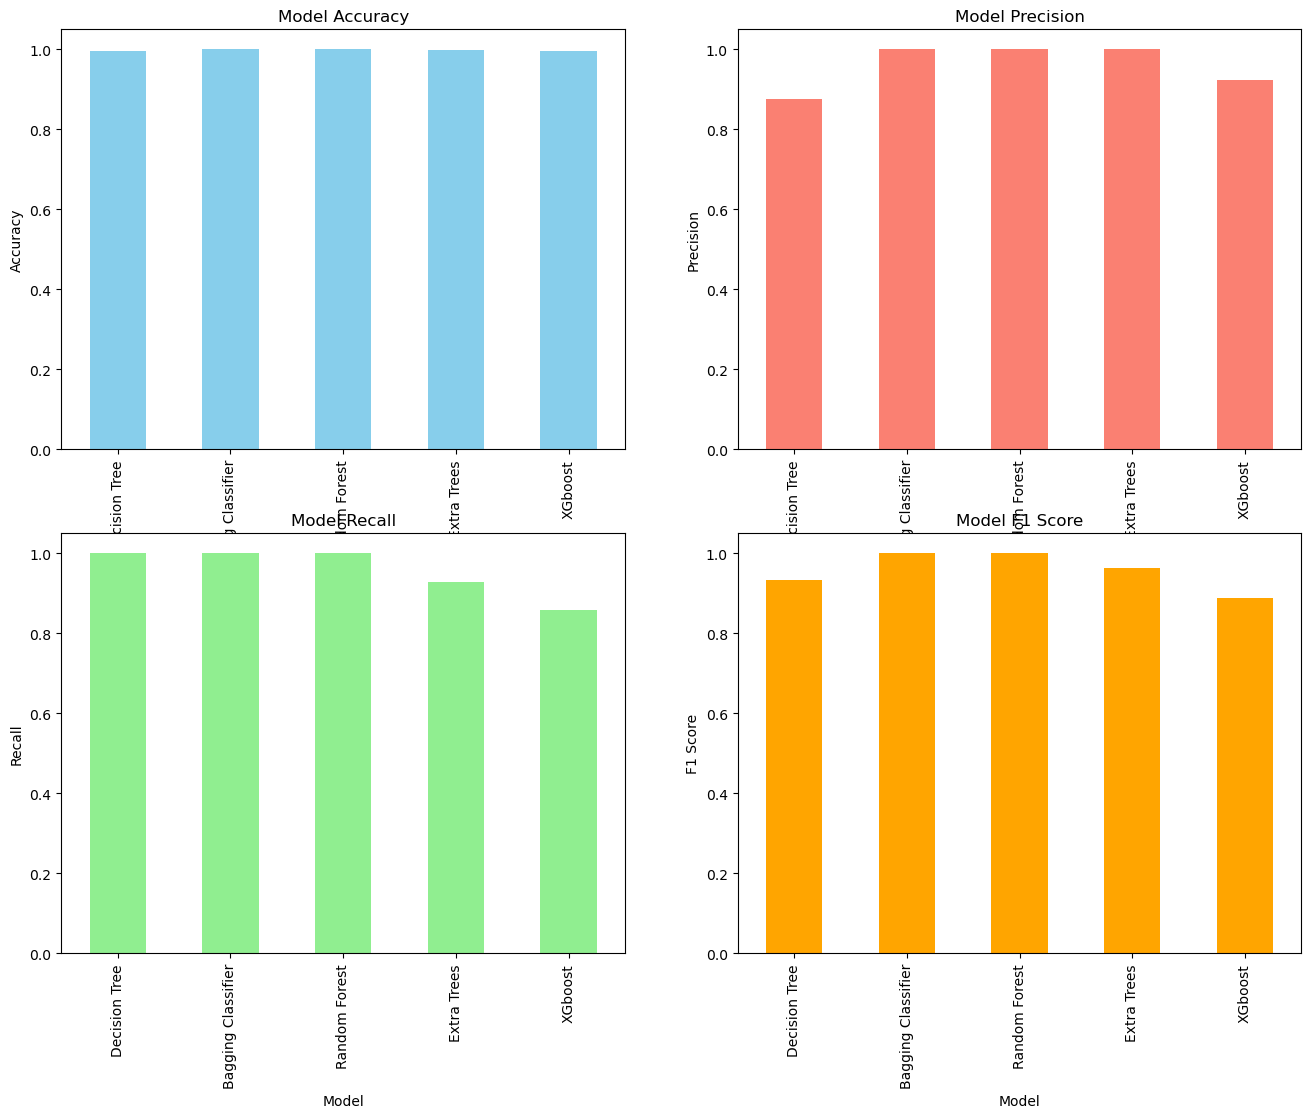

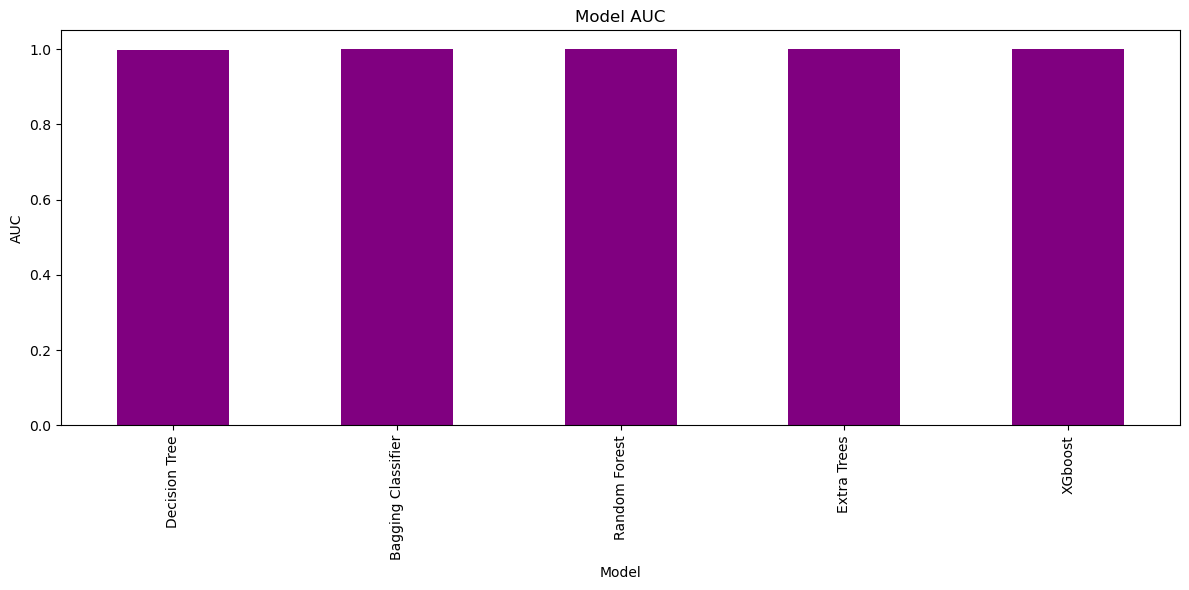

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect all evaluation metrics
results = [
    {'Model': 'Decision Tree', 'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1 Score': f1_dt, 'AUC': auc_dt},
    {'Model': 'Bagging Classifier', 'Accuracy': accuracy_bagging, 'Precision': precision_bagging, 'Recall': recall_bagging, 'F1 Score': f1_bagging, 'AUC': auc_bagging},
    {'Model': 'Random Forest', 'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_rf, 'AUC': auc_rf},
    {'Model': 'Extra Trees', 'Accuracy': accuracy_extratree, 'Precision': precision_extratree, 'Recall': recall_extratree, 'F1 Score': f1_extratree, 'AUC': auc_extratree},
    # {'Model': 'LightGBM', 'Accuracy': accuracy_lgb, 'Precision': precision_lgb, 'Recall': recall_lgb, 'F1 Score': f1_lgb, 'AUC': auc_lgb},
    {'Model': 'XGboost', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC': auc},

]

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plot Accuracy
results_df.set_index('Model')['Accuracy'].plot(kind='bar', ax=ax[0, 0], color='skyblue', legend=False)
ax[0, 0].set_title('Model Accuracy')
ax[0, 0].set_ylabel('Accuracy')

# Plot Precision
results_df.set_index('Model')['Precision'].plot(kind='bar', ax=ax[0, 1], color='salmon', legend=False)
ax[0, 1].set_title('Model Precision')
ax[0, 1].set_ylabel('Precision')

# Plot Recall
results_df.set_index('Model')['Recall'].plot(kind='bar', ax=ax[1, 0], color='lightgreen', legend=False)
ax[1, 0].set_title('Model Recall')
ax[1, 0].set_ylabel('Recall')

# Plot F1 Score
results_df.set_index('Model')['F1 Score'].plot(kind='bar', ax=ax[1, 1], color='orange', legend=False)
ax[1, 1].set_title('Model F1 Score')
ax[1, 1].set_ylabel('F1 Score')

# Plot AUC
fig, ax2 = plt.subplots(figsize=(12, 6))
results_df.set_index('Model')['AUC'].plot(kind='bar', color='purple', legend=False, ax=ax2)
ax2.set_title('Model AUC')
ax2.set_ylabel('AUC')

plt.tight_layout()
plt.show()


# lstm forcast bunkrupsy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# Load your dataset
data = pd.read_csv('your_data.csv')

# Convert 'filed' to datetime and sort by date
data['filed'] = pd.to_datetime(data['filed'])
data = data.sort_values(by='filed')

# Create lag features (e.g., past values of financial metrics)
data['Assets_lag1'] = data['Assets'].shift(1)
data['NetIncome_lag1'] = data['NetIncome'].shift(1)

# Drop missing values (caused by shifting/lagging)
data.dropna(inplace=True)

# Features (lagged financial data) and target (is_bankrupt)
features = ['Assets_lag1', 'NetIncome_lag1']
X = data[features]
y = data['is_bankrupt']

# Split data into training and testing sets before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features after the split to avoid data leakage
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for LSTM [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define a function to build the LSTM model (required for KerasClassifier)
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary output (0 or 1)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'units': [50, 100],  # Number of LSTM units
    'dropout_rate': [0.2, 0.4],  # Dropout rates
    'batch_size': [32, 64],  # Batch sizes
    'epochs': [10, 20]  # Number of epochs
}

# Perform GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Use the best model to predict on the test set
best_model = grid_result.best_estimator_
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the best model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')


# arima( credit score )

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# data = pd.read_csv('your_data.csv')  # Replace with your actual data path

# Convert 'filed' to datetime and sort by date
data['filed'] = pd.to_datetime(data['filed'])
data = data.sort_values(by='filed')

# Extract 'filed' and 'CreditScore'
credit_score_data = data.set_index('filed')['CreditScore'].dropna()

# Train-test split
train_size = int(len(credit_score_data) * 0.8)
train_data, test_data = credit_score_data[:train_size], credit_score_data[train_size:]

# Fit ARIMA model on training data
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast on test data
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error (MSE): {mse}')

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('CreditScore Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('CreditScore')
plt.legend()
plt.show()


# transformers 


In [142]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define Transformer model class
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_encoder_layers, dropout):
        super(TransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=model_dim, nhead=num_heads, dropout=dropout
        )
        self.transformer_encoder = nn.TransformerEncoder(
            self.encoder_layer, num_layers=num_encoder_layers
        )
        self.fc = nn.Linear(model_dim, 1)

    def forward(self, src):
        output = self.transformer_encoder(src)
        output = self.fc(output[-1])
        return output

# Convert 'filed' to datetime and sort by date
data['filed'] = pd.to_datetime(data['filed'])
data = data.sort_values(by='filed')

# Extract 'filed' and 'CreditScore'
credit_score_data = data.set_index('filed')['CreditScore'].dropna()

# Train-test split
train_size = int(len(credit_score_data) * 0.8)
train_data, test_data = credit_score_data[:train_size], credit_score_data[train_size:]

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Convert to PyTorch tensors
train_data_tensor = torch.tensor(train_data_scaled, dtype=torch.float32).view(-1, 1)
test_data_tensor = torch.tensor(test_data_scaled, dtype=torch.float32).view(-1, 1)

# Define Transformer model
model = TransformerModel(input_dim=1, model_dim=64, num_heads=4, num_encoder_layers=3, dropout=0.2)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
model.train()
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(train_data_tensor.unsqueeze(1))  # Add dimension for sequence length
    loss = criterion(output, train_data_tensor[-1])  # Compare only last value
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Forecast on test data
model.eval()
with torch.no_grad():
    predicted = model(test_data_tensor.unsqueeze(1))

# Inverse scale the predictions
predicted_inverse = scaler.inverse_transform(predicted.detach().numpy())

# Plot actual vs predicted CreditScore
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual CreditScore')
plt.plot(test_data.index, predicted_inverse, label='Predicted CreditScore')
plt.title('CreditScore Forecast using Transformer')
plt.xlabel('Date')
plt.ylabel('CreditScore')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'torch'